In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from pylab import rcParams

# To display multiple dataframes from one cell
from IPython.display import display

# To perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# To build a logistic regression model
from sklearn.linear_model import LinearRegression

#To build exponential smoothening models
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# To visualize ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# To build ARIMA model
from statsmodels.tsa.arima.model import ARIMA

#  To perform date arithmetic, allowing easy calculations and manipulations
from dateutil.relativedelta import relativedelta


# To evaluate the performance of the model
from sklearn.metrics import mean_squared_error
from sklearn import metrics
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the sparkling dataset
path_1 = 'C:\\Users\\Ishaan Shakti\\Documents\\Great Lakes\\9 - Time Series Forecasting\\Project Work - Coded\\Sparkling.csv'
# importing the rose dataset
path_2 = 'C:\\Users\\Ishaan Shakti\\Documents\\Great Lakes\\9 - Time Series Forecasting\\Project Work - Coded\\Rose.csv'
df_sparkling = pd.read_csv(path_1)
df_rose = pd.read_csv(path_2)

## DATA OVERVIEW (SPARKLING)

In [4]:
# view the first 5 rows
df_sparkling.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [5]:
# view the last 5 rows
df_sparkling.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [6]:
# view the shape of the data
df_sparkling.shape

(187, 2)

In [7]:
# view the datatype of the column
df_sparkling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [8]:
# viewing the statistical summary
df_sparkling.describe().T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

In [9]:
# check for missing values
df_sparkling.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [10]:
# check for duplicate values
df_sparkling.duplicated().sum()

0

## DATA OVERVIEW (ROSE)

In [12]:
# view the first 5 rows
df_rose.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [13]:
# view the last 5 rows
df_rose.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [14]:
# view the shape of the data
df_rose.shape

(187, 2)

In [15]:
# view the datatype of the column
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [16]:
# viewing the statistical summary
df_rose.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  185.0  90.394595  39.175344  28.0  63.0  86.0  112.0  267.0

In [17]:
# check for missing values
df_rose.isnull().sum()

YearMonth    0
Rose         2
dtype: int64

In [18]:
# check for duplicate values
df_rose.duplicated().sum()

0

 ## EDA (SPARKLING)

In [20]:
# reading the sparkling data as time series data
Time_Sparkling= pd.date_range(start='1/1/1980',end='8/1/1995',freq='M')
Time_Sparkling

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='ME')

In [21]:
df_sparkling['Time_Sparkling'] = Time_Sparkling

In [22]:
df_sparkling.set_index(keys='Time_Sparkling', inplace=True)
df_sparkling.drop(['YearMonth'], axis=1, inplace=True)
df_sparkling.head()

Sparkling
Time_Sparkling           
1980-01-31           1686
1980-02-29           1591
1980-03-31           2304
1980-04-30           1712
1980-05-31           1471

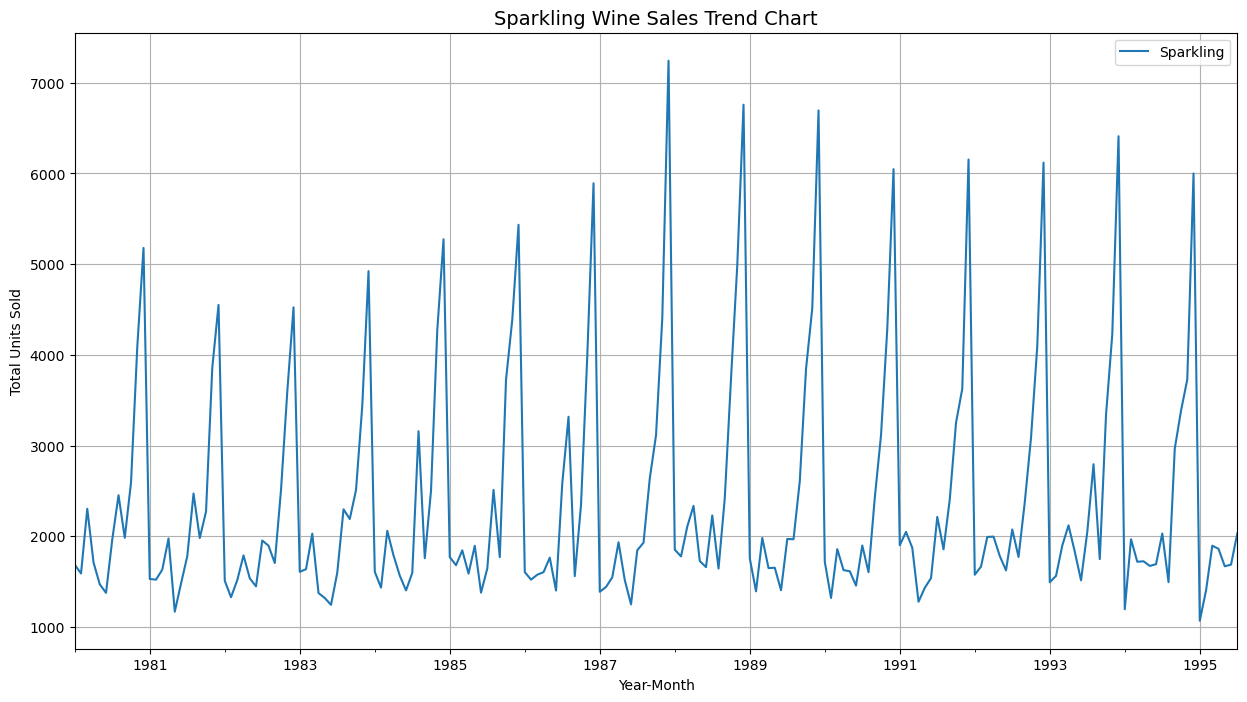

In [23]:
rcParams['figure.figsize'] = 15,8
df_sparkling.plot(grid=True);
plt.title('Sparkling Wine Sales Trend Chart', fontsize=14)
plt.xlabel('Year-Month',fontsize=10)
plt.ylabel('Total Units Sold',fontsize=10);

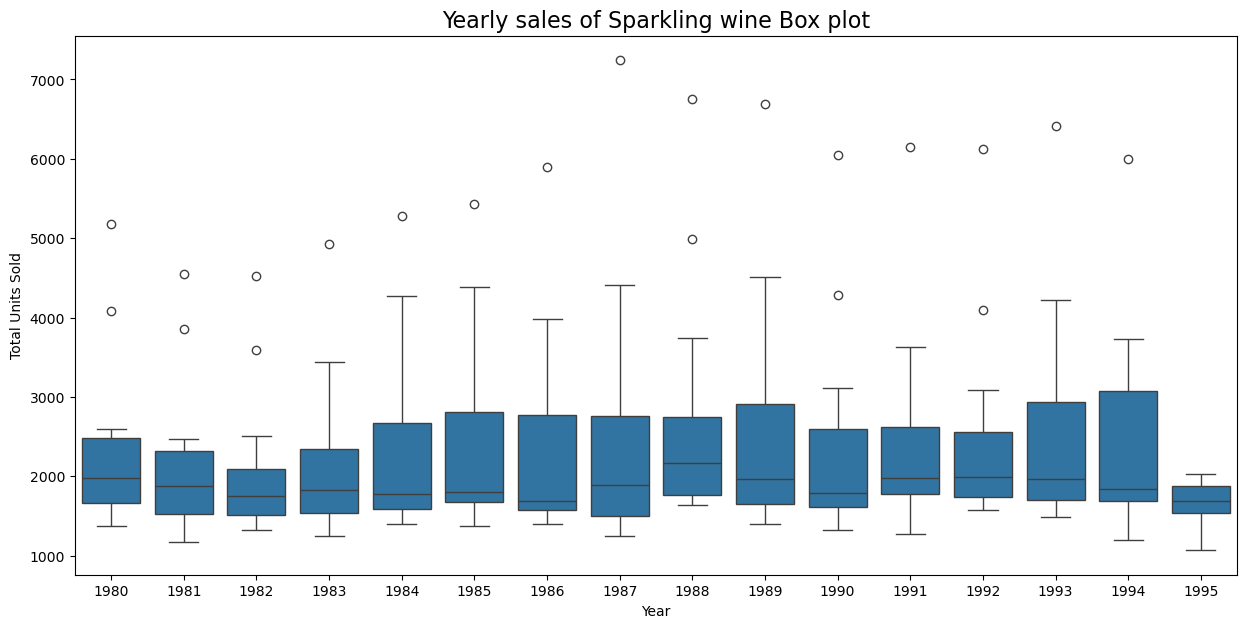

In [24]:
# boxplot of yearly sales
plt.figure(figsize = (15, 7))
sns.boxplot(x = df_sparkling.index.year,y = df_sparkling.values[:,0])
plt.title('Yearly sales of Sparkling wine Box plot', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Units Sold');

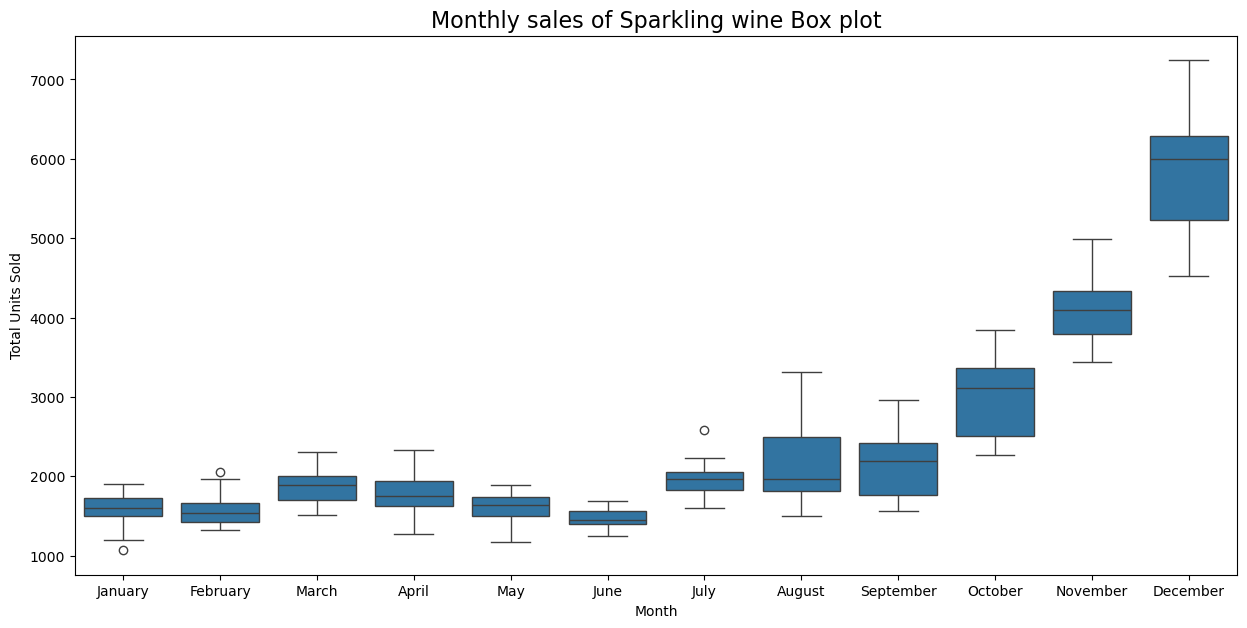

In [25]:
# boxplot of yearly sales
plt.figure(figsize = (15, 7))
sns.boxplot(x = df_sparkling.index.month_name(),y = df_sparkling.values[:,0])
plt.title('Monthly sales of Sparkling wine Box plot', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Units Sold');

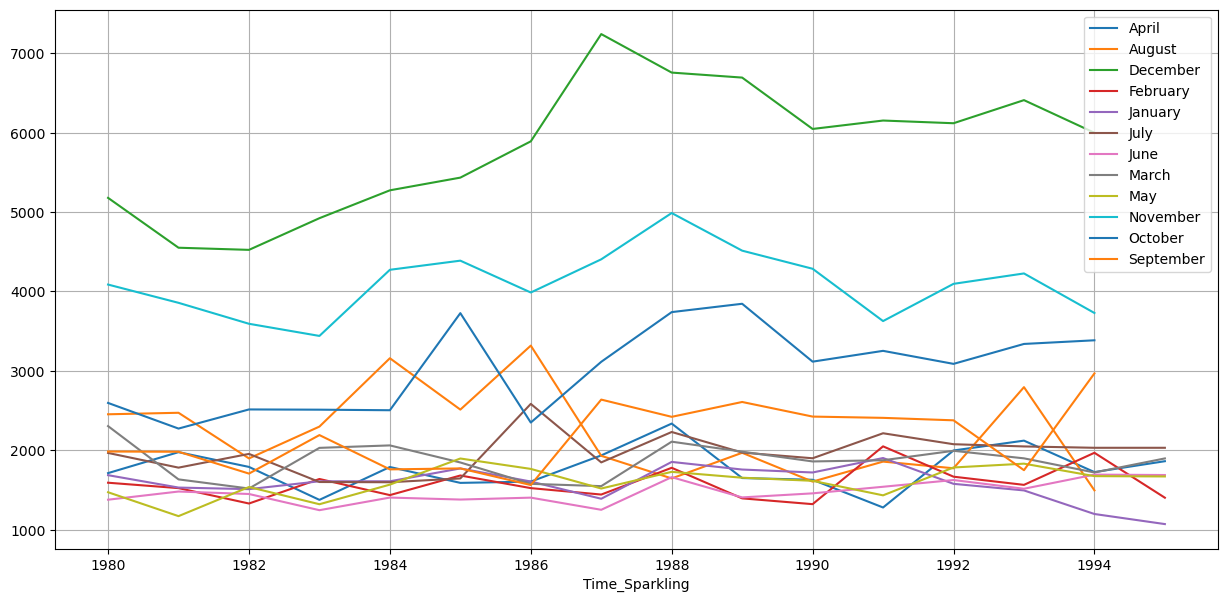

In [26]:
# trend of monthly sales across years
monthly_sales_across_years = pd.pivot_table(df_sparkling, values = 'Sparkling', columns = df_sparkling.index.month_name(), index = df_sparkling.index.year)
monthly_sales_across_years.plot(figsize=(15,7))
plt.grid()
plt.legend(loc='best');

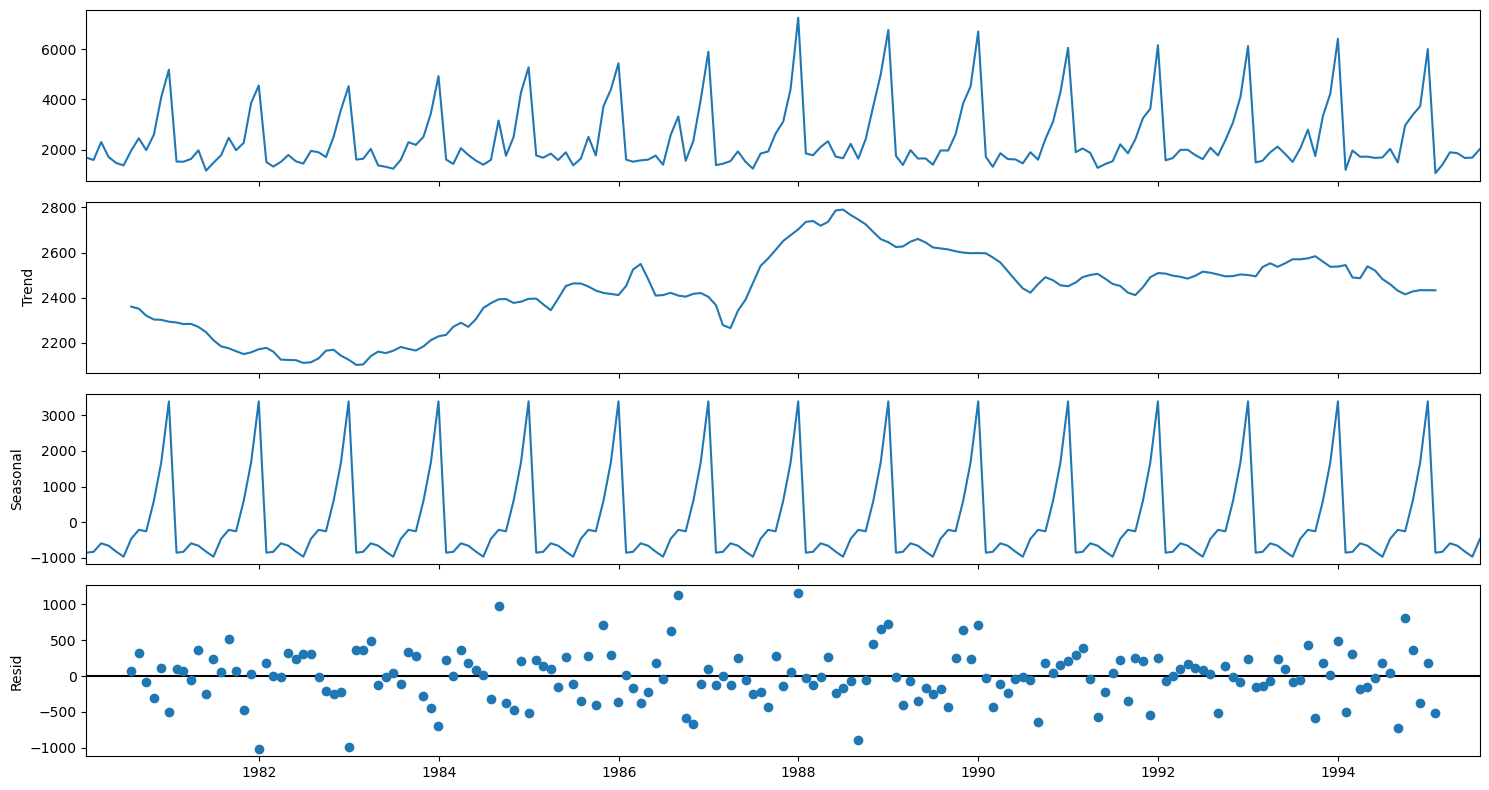

In [27]:
# decomposition (additive model)
decomposition = seasonal_decompose(df_sparkling,model='additive')
decomposition.plot();

In [28]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Sparkling
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Sparkling
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Sparkling
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31

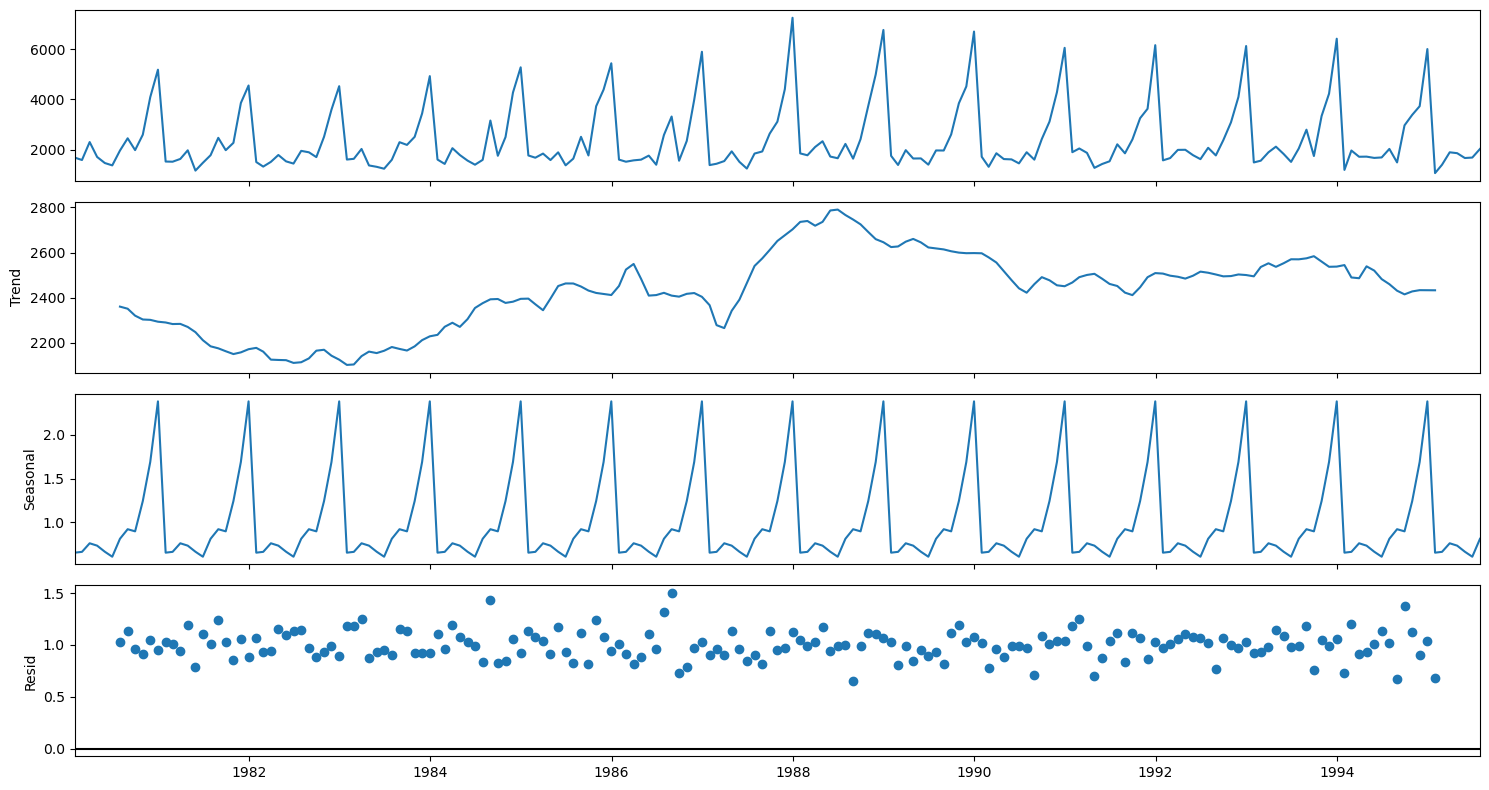

In [29]:
# decomposition (multiplicative model)
decomposition = seasonal_decompose(df_sparkling,model='multiplicative')
decomposition.plot();

In [30]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Sparkling
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Sparkling
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Sparkling
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.94

## DATA PREPROCESSING (SPARKLING)

In [32]:
# Split the data into training and testing sets
train = df_sparkling[df_sparkling.index < '1991-01-01']
test = df_sparkling[df_sparkling.index >= '1991-01-01']

In [33]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (132, 1)
test dataset:  (55, 1) 

Rows of dataset: 
First few rows of Training Data 
                 Sparkling
Time_Sparkling           
1980-01-31           1686
1980-02-29           1591
1980-03-31           2304
1980-04-30           1712
1980-05-31           1471 

Last few rows of Training Data 
                 Sparkling
Time_Sparkling           
1990-08-31           1605
1990-09-30           2424
1990-10-31           3116
1990-11-30           4286
1990-12-31           6047 

First few rows of Test Data 
                 Sparkling
Time_Sparkling           
1991-01-31           1902
1991-02-28           2049
1991-03-31           1874
1991-04-30           1279
1991-05-31           1432 

Last few rows of Test Data 
                 Sparkling
Time_Sparkling           
1995-03-31           1897
1995-04-30           1862
1995-05-31           1670
1995-06-30           1688
1995-07-31           2031 



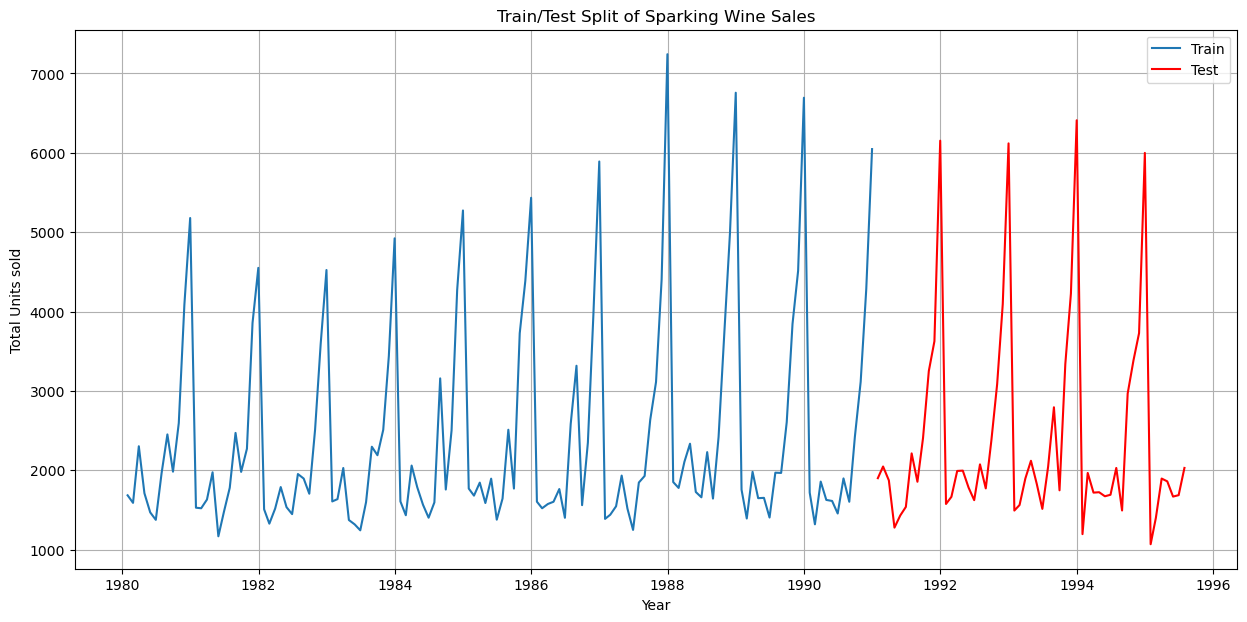

In [34]:
plt.figure(figsize = (15, 7))
plt.plot(train['Sparkling'], label = 'Train')
plt.plot(test['Sparkling'], label = 'Test', color='Red')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Total Units sold')
plt.title('Train/Test Split of Sparking Wine Sales', fontsize = 12)
plt.show;
plt.grid();

## MODEL BUILDING (SPARKLING)

In [36]:
# generating the numerical time instance order for both the training and test set.
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('\n')
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [37]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [38]:
LinearRegression_train['Time'] = train_time
LinearRegression_test['Time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
                 Sparkling  Time
Time_Sparkling                 
1980-01-31           1686     1
1980-02-29           1591     2
1980-03-31           2304     3
1980-04-30           1712     4
1980-05-31           1471     5 

Last few rows of Training Data 
                 Sparkling  Time
Time_Sparkling                 
1990-08-31           1605   128
1990-09-30           2424   129
1990-10-31           3116   130
1990-11-30           4286   131
1990-12-31           6047   132 

First few rows of Test Data 
                 Sparkling  Time
Time_Sparkling                 
1991-01-31           1902   133
1991-02-28           2049   134
1991-03-31           1874   135
1991-04-30           1279   136
1991-05-31           1432   137 

Last few rows of Test Data 
                 Sparkling  Time
Time_Sparkling                 
1995-03-31           1897   183
1995-04-30           1862   184
1995-05-31           1670   185
1995-06-30           1688   186
1995

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(LinearRegression_train[['Time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

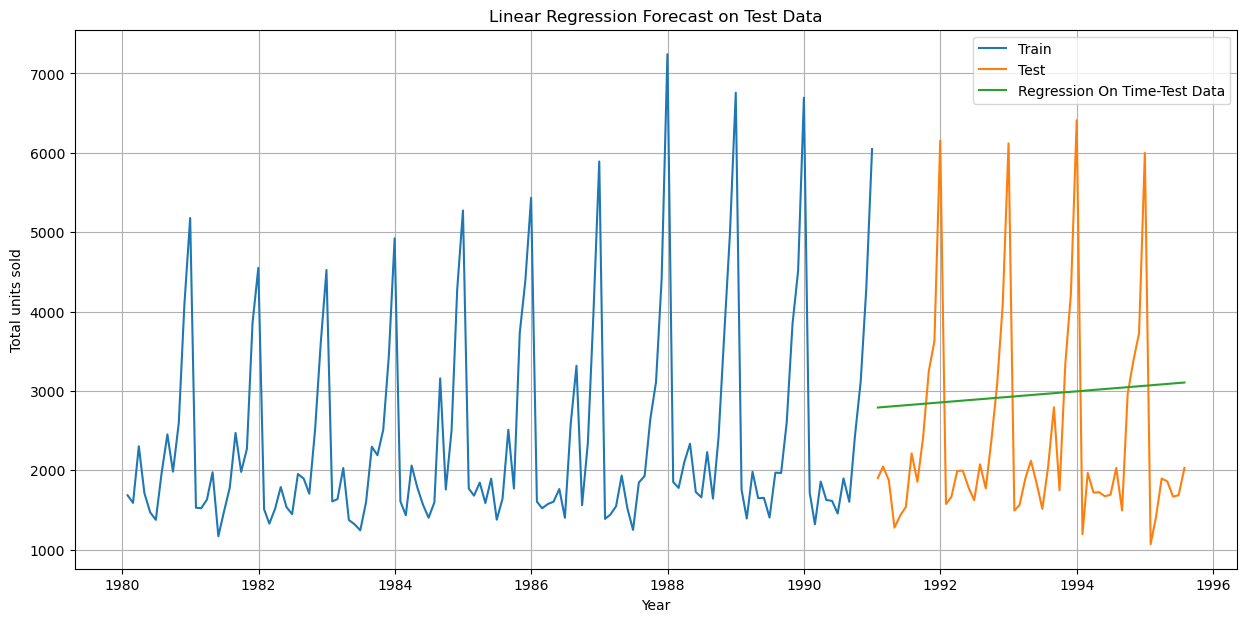

In [41]:
test_predictions_model1 = lr.predict(LinearRegression_test[['Time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

train_predictions_model1 = lr.predict(LinearRegression_train[['Time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

plt.figure(figsize=(15,7))
plt.title('Linear Regression Forecast on Test Data')
plt.xlabel('Year')
plt.ylabel('Total units sold')
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time-Test Data')
plt.legend(loc='best')
plt.grid();

In [42]:
# Test Data - RMSE
from sklearn import metrics
rmse_LR_test = metrics.mean_squared_error(test['Sparkling'],LinearRegression_test['RegOnTime'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_LR_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [43]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_LR_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  1389.135175

In [44]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [45]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Sparkling                          
1991-01-31           1902    2403.780303
1991-02-28           2049    2403.780303
1991-03-31           1874    2403.780303
1991-04-30           1279    2403.780303
1991-05-31           1432    2403.780303

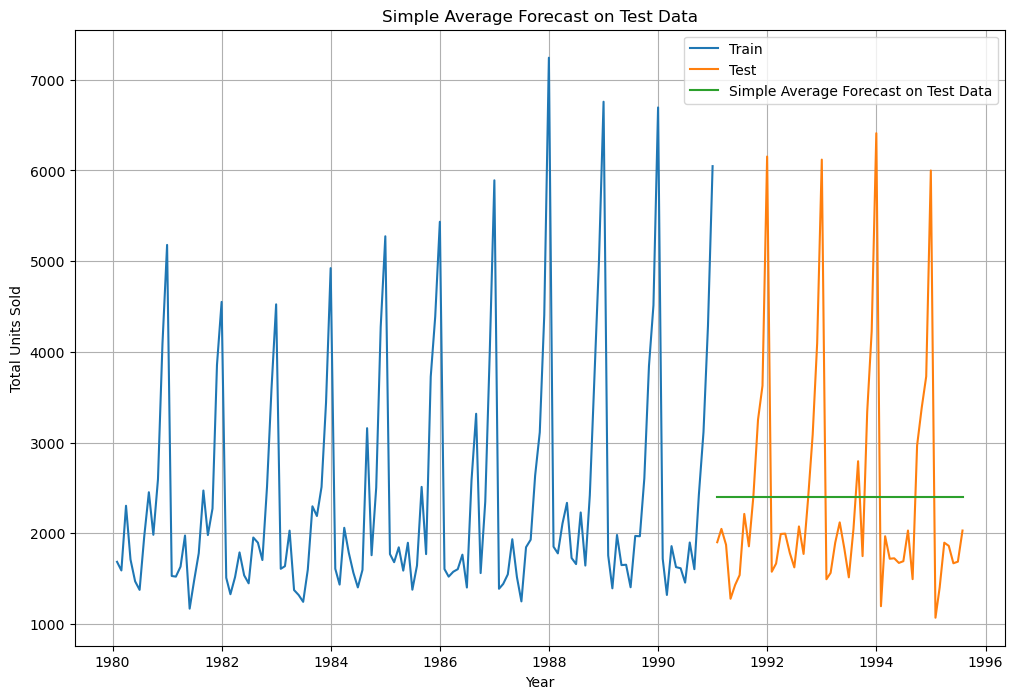

In [46]:
plt.figure(figsize=(12,8))
plt.title('Simple Average Forecast on Test Data')
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.grid();

In [47]:
## Test Data - RMSE 

rmse_simple_average_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_simple_average_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [48]:
resultsDf2 = pd.DataFrame({'Test RMSE': [rmse_simple_average_test]},index=['Simple Average'])

resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

Test RMSE
Linear Regression  1389.135175
Simple Average     1275.081804

In [49]:
MovingAverage = df_sparkling.copy()
MovingAverage.head()

Sparkling
Time_Sparkling           
1980-01-31           1686
1980-02-29           1591
1980-03-31           2304
1980-04-30           1712
1980-05-31           1471

In [50]:
# trailing Moving Average
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head(9)

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time_Sparkling                                                             
1980-01-31           1686         NaN         NaN          NaN          NaN
1980-02-29           1591      1638.5         NaN          NaN          NaN
1980-03-31           2304      1947.5         NaN          NaN          NaN
1980-04-30           1712      2008.0     1823.25          NaN          NaN
1980-05-31           1471      1591.5     1769.50          NaN          NaN
1980-06-30           1377      1424.0     1716.00  1690.166667          NaN
1980-07-31           1966      1671.5     1631.50  1736.833333          NaN
1980-08-31           2453      2209.5     1816.75  1880.500000          NaN
1980-09-30           1984      2218.5     1945.00  1827.166667  1838.222222

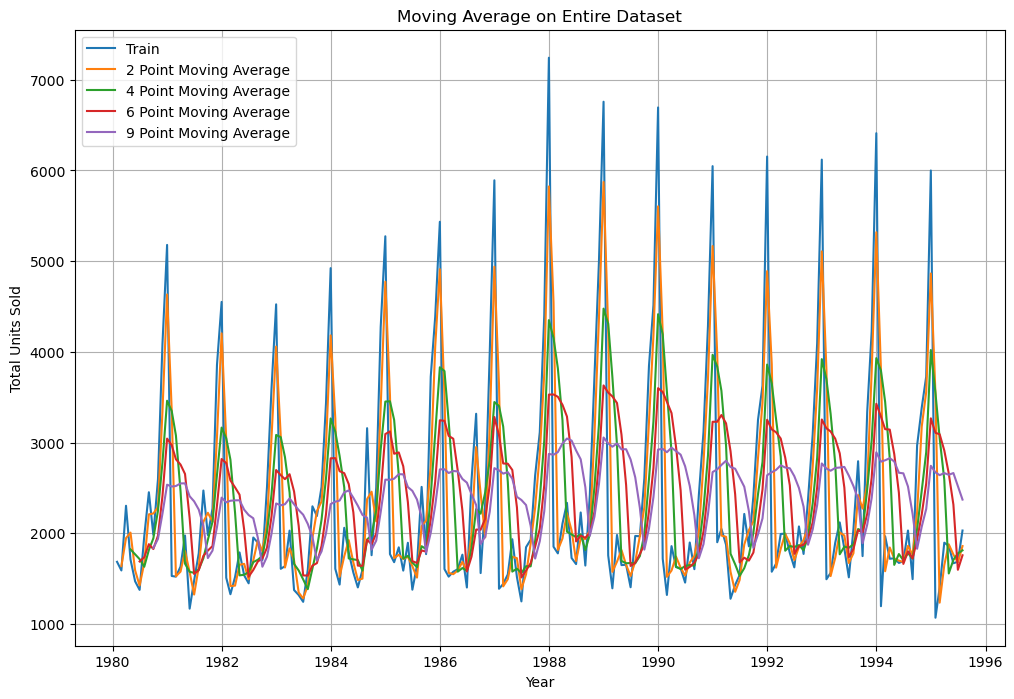

In [51]:
#Plotting on the whole data

plt.figure(figsize=(12,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.title('Moving Average on Entire Dataset')
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.legend(loc = 'best')
plt.grid();

In [52]:
# creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

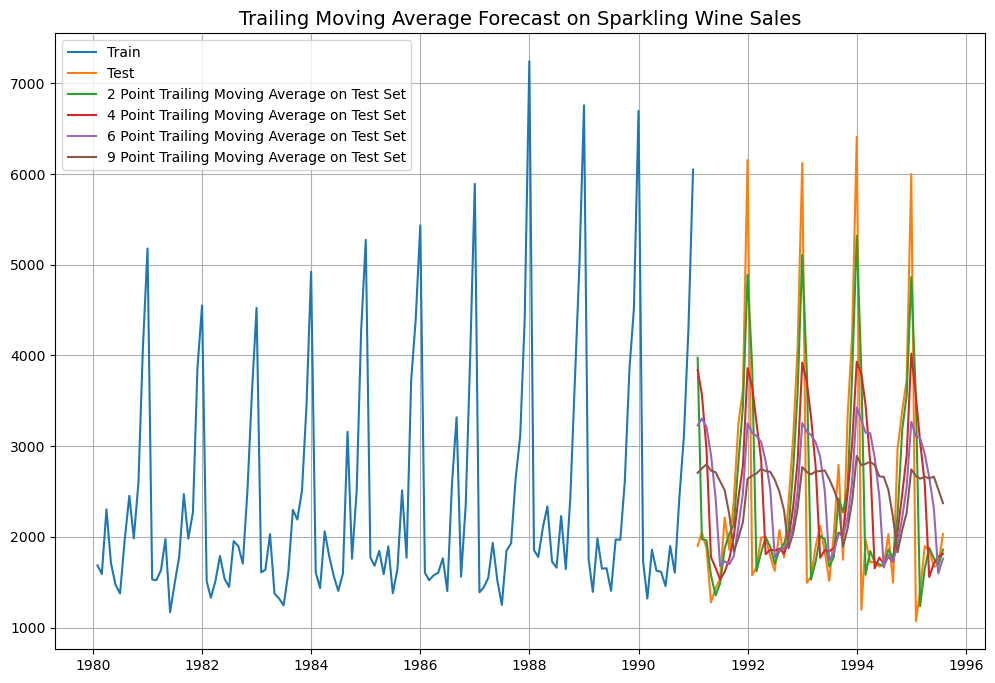

In [53]:
## Plotting on both the Training and Test data

plt.figure(figsize=(12,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.title("Trailing Moving Average Forecast on Sparkling Wine Sales", fontsize=14)
plt.legend(loc = 'best')
plt.grid();

In [54]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_MA_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_MA_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_MA_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_MA_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [55]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_MA_test_2,rmse_MA_test_4
                                          ,rmse_MA_test_6,rmse_MA_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression            1389.135175
Simple Average               1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

In [56]:
SES_train = train.copy()
SES_test = test.copy()

In [57]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [58]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [59]:
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [60]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
Time_Sparkling                        
1991-01-31           1902  2676.676366
1991-02-28           2049  2676.676366
1991-03-31           1874  2676.676366
1991-04-30           1279  2676.676366
1991-05-31           1432  2676.676366

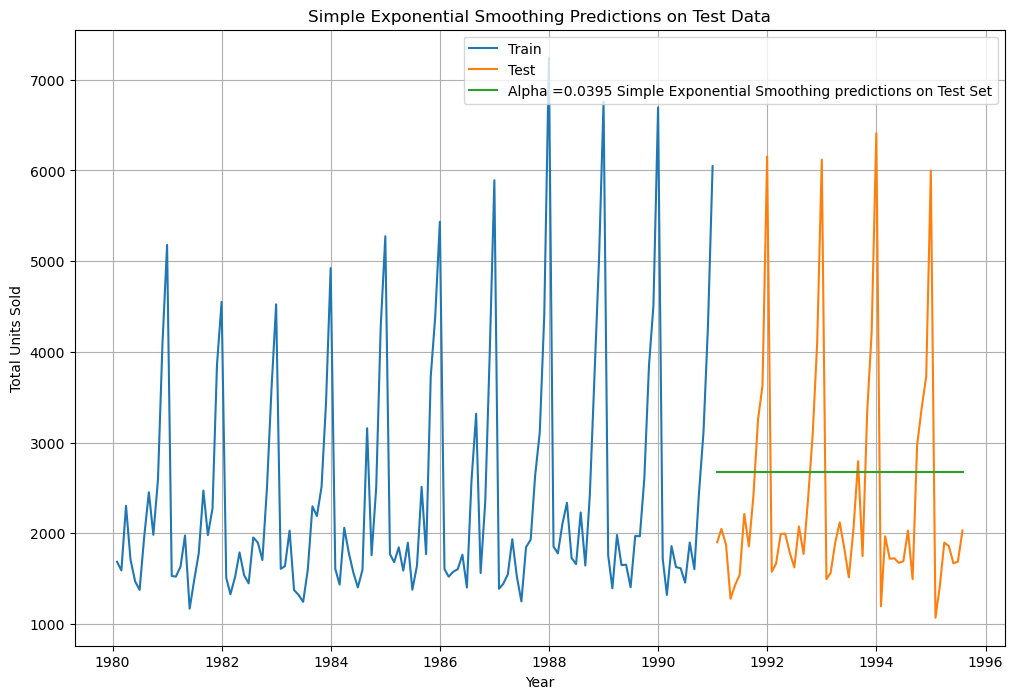

In [61]:
## Plotting on both the Training and Test data

plt.figure(figsize=(12,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0395 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Predictions on Test Data');
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.grid();

In [62]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.0395 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.0395 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1304.927


In [63]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha =0.0395,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression                         1389.135175
Simple Average                            1275.081804
2pointTrailingMovingAverage                813.400684
4pointTrailingMovingAverage               1156.589694
6pointTrailingMovingAverage               1283.927428
9pointTrailingMovingAverage               1346.278315
Alpha =0.0395,SimpleExponentialSmoothing  1304.927405

In [64]:
DES_train = train.copy()
DES_test = test.copy()

In [65]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(DES_train['Sparkling'])

In [66]:
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [67]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Sparkling      predict
Time_Sparkling                        
1991-01-31           1902  5221.278699
1991-02-28           2049  5127.886554
1991-03-31           1874  5034.494409
1991-04-30           1279  4941.102264
1991-05-31           1432  4847.710119

In [68]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_5 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_5

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [69]:
for i in np.arange(0.05, 1.05, 0.05):
    for j in np.arange(0.05, 1.05, 0.05):
        # Fit the model
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend=j, optimized=False, use_brute=True)
        
        # Generate predictions
        DES_train['predict', i, j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict', i, j] = model_DES_alpha_i_j.forecast(len(test))
        
        # Calculate RMSE for train and test sets
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'], DES_train['predict', i, j], squared=False)
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'], DES_test['predict', i, j], squared=False)
        
        # Create a temporary DataFrame for the current iteration
        temp_df = pd.DataFrame({'Alpha': [i], 'Beta': [j], 'Train RMSE': [rmse_model6_train], 'Test RMSE': [rmse_model6_test]})
        
        # Concatenate the temporary DataFrame with the results DataFrame
        resultsDf_5 = pd.concat([resultsDf_5, temp_df], ignore_index=True)

In [70]:
print(resultsDf_5)

     Alpha Values  Beta Values   Train RMSE     Test RMSE  Alpha  Beta
0             NaN          NaN  1430.025526   1418.407668   0.05  0.05
1             NaN          NaN  1385.420826   1466.899629   0.05  0.10
2             NaN          NaN  1379.162520   1457.041594   0.05  0.15
3             NaN          NaN  1382.766405   1443.099273   0.05  0.20
4             NaN          NaN  1390.407645   1550.422496   0.05  0.25
..            ...          ...          ...           ...    ...   ...
395           NaN          NaN  1902.013709  55442.273880   1.00  0.80
396           NaN          NaN  1942.749655  56677.130498   1.00  0.85
397           NaN          NaN  1985.368445  57823.177011   1.00  0.90
398           NaN          NaN  2030.204345  58888.482146   1.00  0.95
399           NaN          NaN  2077.672157  59877.076519   1.00  1.00

[400 rows x 6 columns]


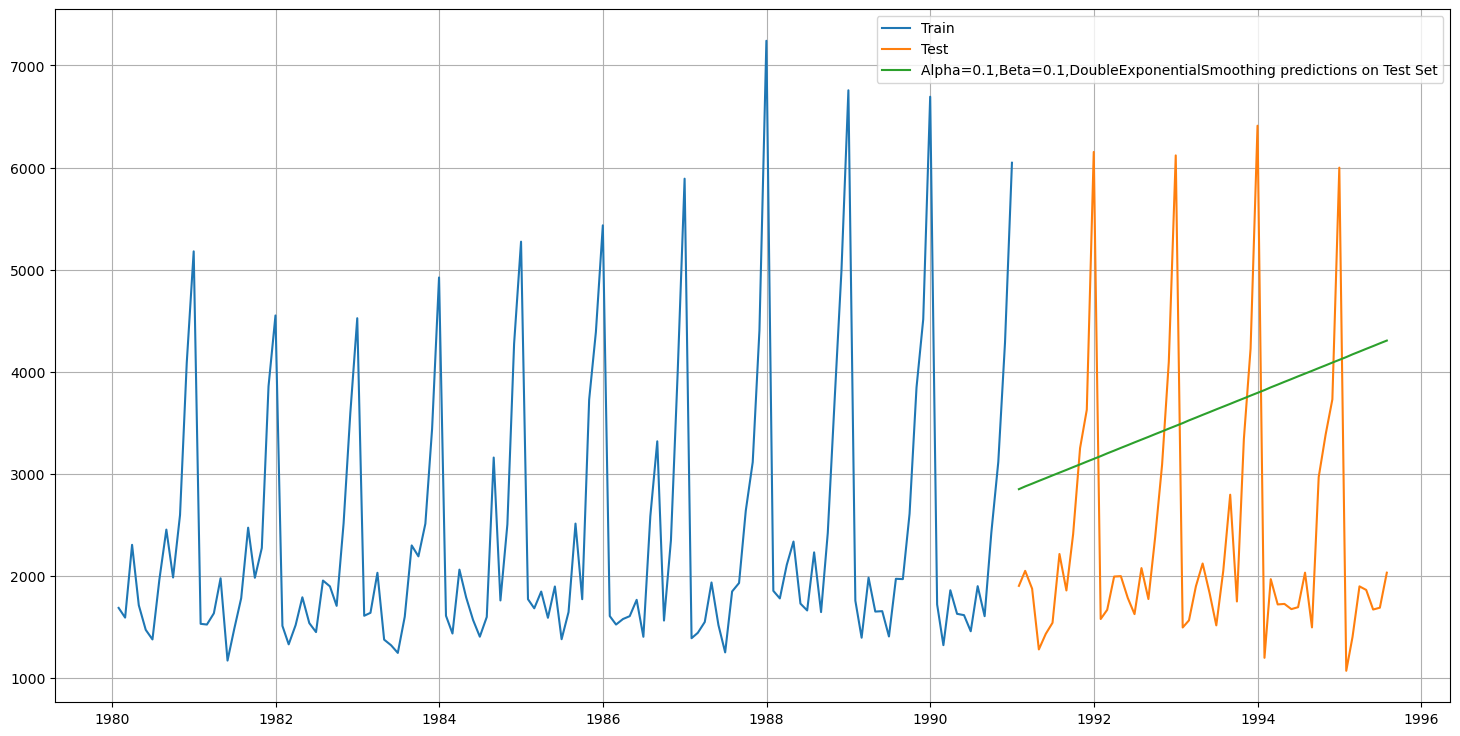

In [71]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [72]:
resultsDf_5_1 = pd.DataFrame({'Test RMSE': [resultsDf_5.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5_1])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Simple Average                                      1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha =0.0395,SimpleExponentialSmoothing            1304.927405
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1418.407668

In [73]:
TES_train = train.copy()
TES_test = test.copy()

In [74]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [75]:
model_TES_autofit = model_TES.fit(optimized=True)

In [76]:
model_TES_autofit.params

{'smoothing_level': 0.11133818361298699,
 'smoothing_trend': 0.049505131019509915,
 'smoothing_seasonal': 0.3620795793580111,
 'damping_trend': nan,
 'initial_level': 2356.4967888704355,
 'initial_trend': -10.187944726007238,
 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
        0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
        1.87340336, 2.37811768]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [77]:
# prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()


Sparkling  auto_predict
Time_Sparkling                         
1991-01-31           1902   1587.497468
1991-02-28           2049   1356.394925
1991-03-31           1874   1762.929755
1991-04-30           1279   1656.165933
1991-05-31           1432   1542.002730

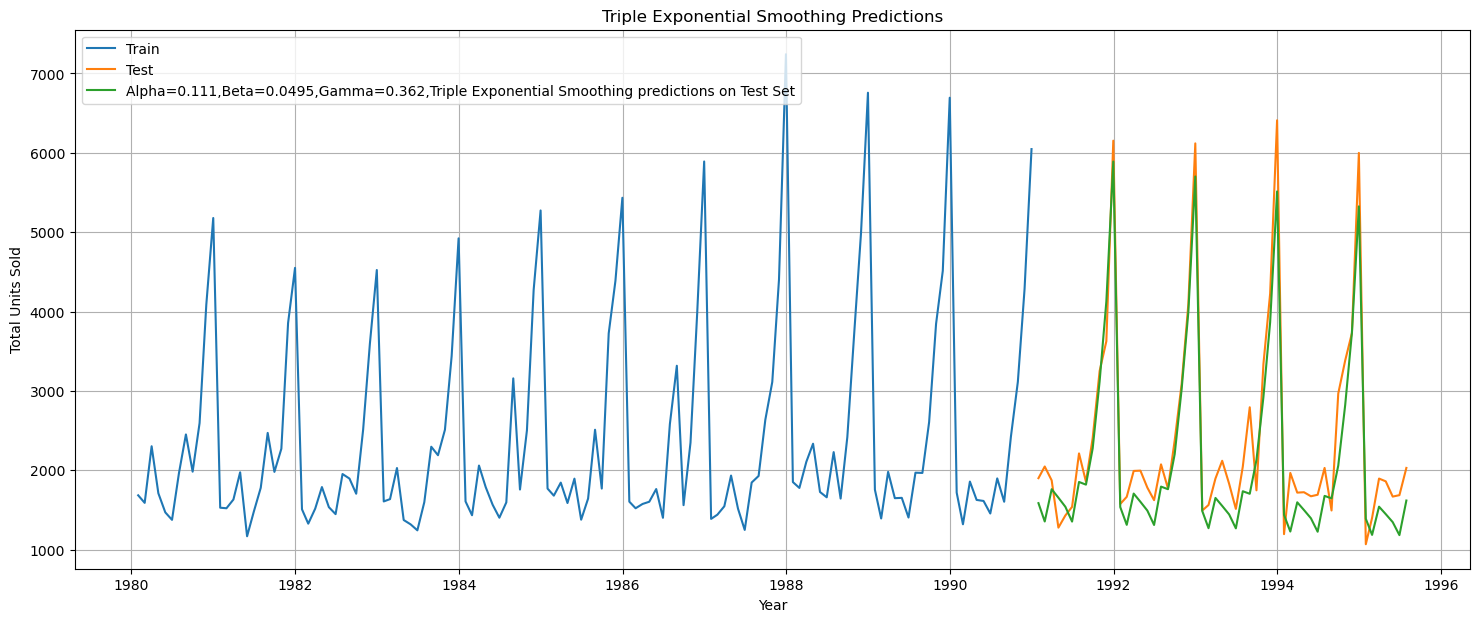

In [78]:
# Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,7))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.0495,Gamma=0.362,Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.grid();

In [79]:
# Test Data

rmse_tes_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.0495,Gamma=0.362, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_tes_test))

For Alpha=0.111,Beta=0.0495,Gamma=0.362, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 404.287


In [80]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_tes_test]}
                           ,index=['Alpha=0.111,Beta=0.0495,Gamma=0.362,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Simple Average                                      1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha =0.0395,SimpleExponentialSmoothing            1304.927405
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1418.407668
Alpha=0.111,Beta=0.0495,Gamma=0.362,Triple Expo...   404.286809

In [81]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6_2 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6_2

Empty DataFrame
Columns: [Alpha, Beta, Gamma, Train RMSE, Test RMSE]
Index: []

In [82]:
for i in np.arange(0.1, 1.05, 0.05):
    for j in np.arange(0.1, 1.05, 0.05):
        for k in np.arange(0.1, 1.05, 0.05):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k,
                                                  optimized=False, use_brute=True)
            TES_train['predict', i, j, k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict', i, j, k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test))

            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'], TES_train['predict', i, j, k], squared=False)
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'], TES_test['predict', i, j, k], squared=False)

            # Create a DataFrame for the new row
            new_row = pd.DataFrame({'Alpha': [i], 'Beta': [j], 'Gamma': [k],
                                    'Train RMSE': [rmse_model8_train], 'Test RMSE': [rmse_model8_test]})

            # Use pd.concat to add the new row to the existing resultsDf_6_2 DataFrame
            resultsDf_6_2 = pd.concat([resultsDf_6_2, new_row], ignore_index=True)

# Optionally, print or return resultsDf_6_2 to verify the output
print(resultsDf_6_2)

      Alpha  Beta  Gamma    Train RMSE     Test RMSE
0       0.1   0.1   0.10  3.814397e+02  5.910387e+02
1       0.1   0.1   0.15  3.735719e+02  6.073917e+02
2       0.1   0.1   0.20  3.677929e+02  6.214407e+02
3       0.1   0.1   0.25  3.638217e+02  6.322427e+02
4       0.1   0.1   0.30  3.614334e+02  6.395595e+02
...     ...   ...    ...           ...           ...
6854    1.0   1.0   0.80  1.101923e+06  2.700435e+05
6855    1.0   1.0   0.85  7.467886e+04  1.094394e+06
6856    1.0   1.0   0.90  7.695708e+04  2.472201e+05
6857    1.0   1.0   0.95  3.058385e+05  1.273915e+06
6858    1.0   1.0   1.00  2.456050e+04  1.256914e+05

[6859 rows x 5 columns]


In [83]:
resultsDf_6_2

Alpha  Beta  Gamma    Train RMSE     Test RMSE
0       0.1   0.1   0.10  3.814397e+02  5.910387e+02
1       0.1   0.1   0.15  3.735719e+02  6.073917e+02
2       0.1   0.1   0.20  3.677929e+02  6.214407e+02
3       0.1   0.1   0.25  3.638217e+02  6.322427e+02
4       0.1   0.1   0.30  3.614334e+02  6.395595e+02
...     ...   ...    ...           ...           ...
6854    1.0   1.0   0.80  1.101923e+06  2.700435e+05
6855    1.0   1.0   0.85  7.467886e+04  1.094394e+06
6856    1.0   1.0   0.90  7.695708e+04  2.472201e+05
6857    1.0   1.0   0.95  3.058385e+05  1.273915e+06
6858    1.0   1.0   1.00  2.456050e+04  1.256914e+05

[6859 rows x 5 columns]

In [84]:
resultsDf_6_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE   Test RMSE
2168   0.40   0.1   0.20  384.467709  317.434302
1806   0.35   0.1   0.15  384.458451  321.078383
1122   0.25   0.2   0.15  391.339330  324.959874
2530   0.45   0.1   0.25  388.413304  325.857010
2169   0.40   0.1   0.25  383.050293  326.251722

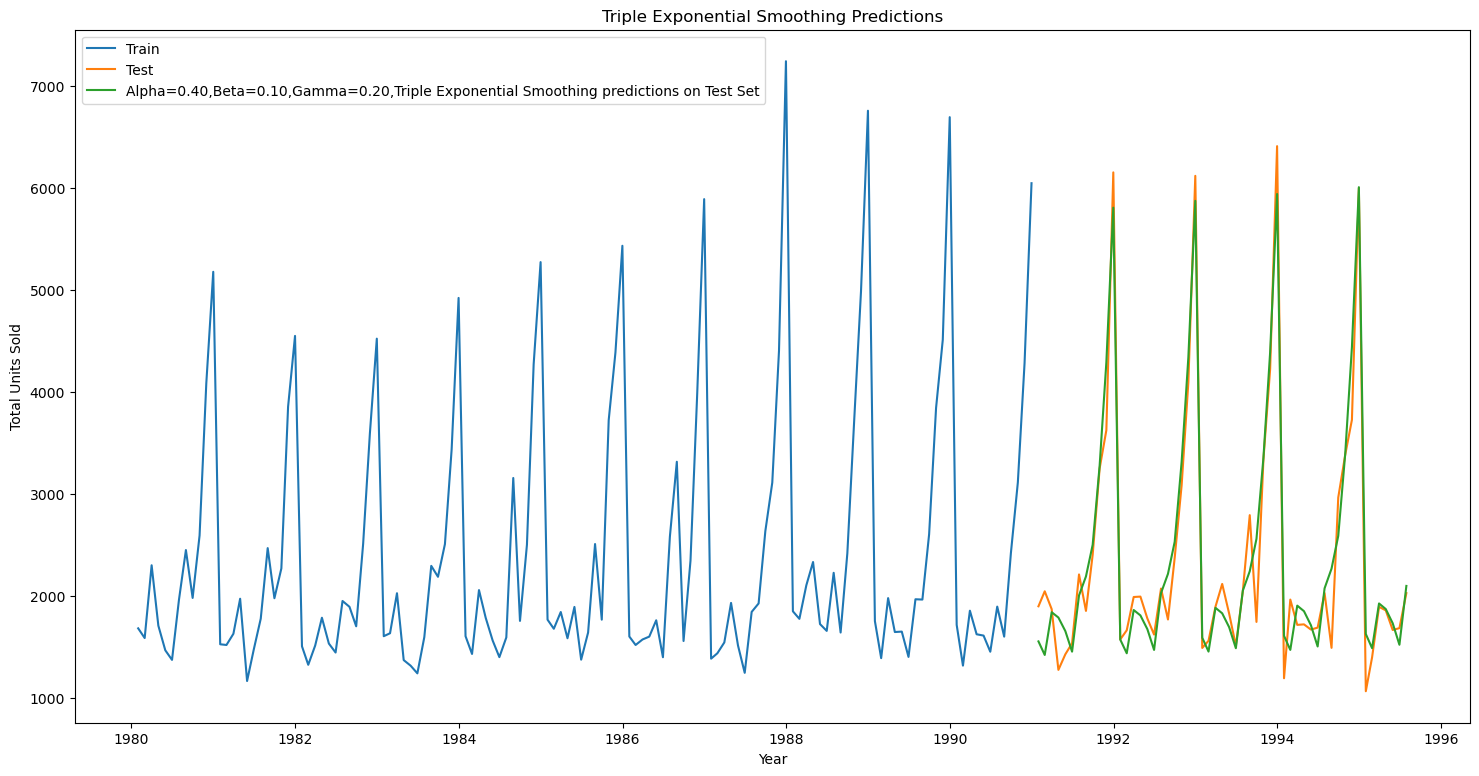

In [85]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=0.40,smoothing_trend=0.10,smoothing_seasonal=0.20,optimized=False,use_brute=True)
TES_train['predict',0.40,0.10,0.20] = model_TES_alpha_i_j_k.fittedvalues
TES_test['predict',0.40,0.10,0.20] = model_TES_alpha_i_j_k.forecast(steps=len(test))
rmse_tes_test_lowest = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',0.40,0.10,0.20],squared=False)
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.40,0.10,0.20], label='Alpha=0.40,Beta=0.10,Gamma=0.20,Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.grid();
plt.grid();

In [86]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_tes_test_lowest]}
                           ,index=['Alpha=0.40,Beta=0.10,Gamma=0.20,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Simple Average                                      1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha =0.0395,SimpleExponentialSmoothing            1304.927405
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1418.407668
Alpha=0.111,Beta=0.0495,Gamma=0.362,Triple Expo...   404.286809
Alpha=0.40,Beta=0.10,Gamma=0.20,Triple Exponent...   317.434302

In [87]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.40,Beta=0.10,Gamma=0.20,Triple Exponent...   317.434302
Alpha=0.111,Beta=0.0495,Gamma=0.362,Triple Expo...   404.286809
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Simple Average                                      1275.081804
6pointTrailingMovingAverage                         1283.927428
Alpha =0.0395,SimpleExponentialSmoothing            1304.927405
9pointTrailingMovingAverage                         1346.278315
Linear Regression                                   1389.135175
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1418.407668

## CHECK FOR STATIONARITY

In [89]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

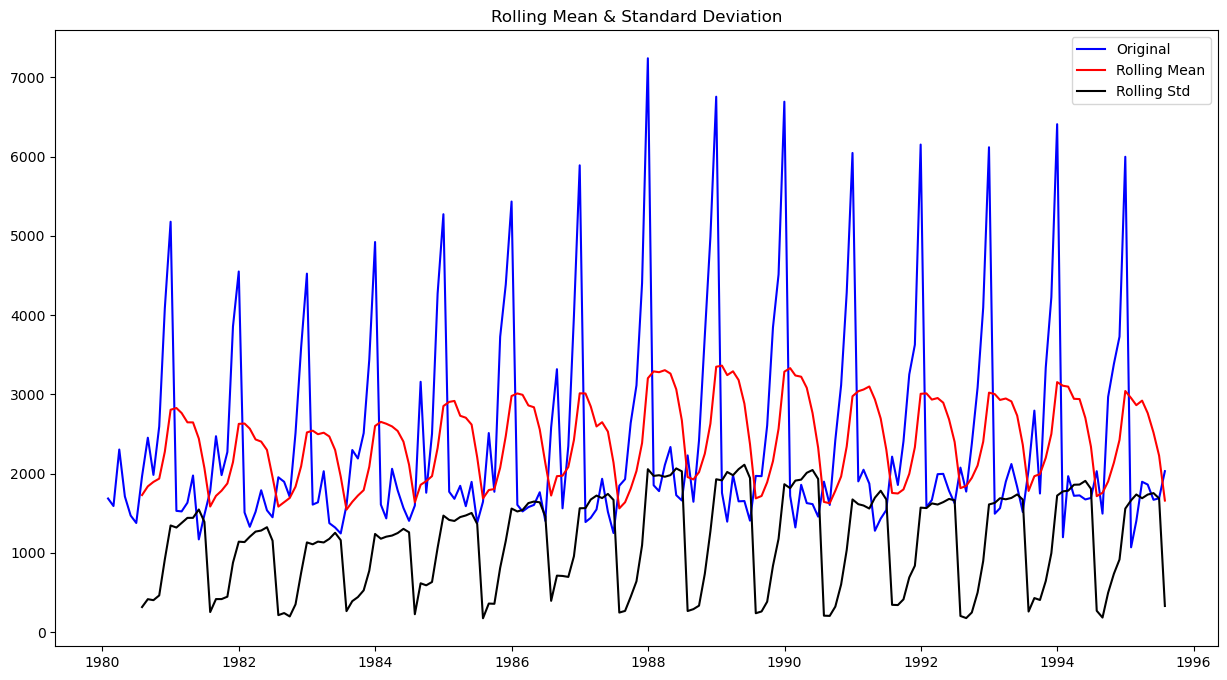

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [90]:
test_stationarity(df_sparkling['Sparkling'])

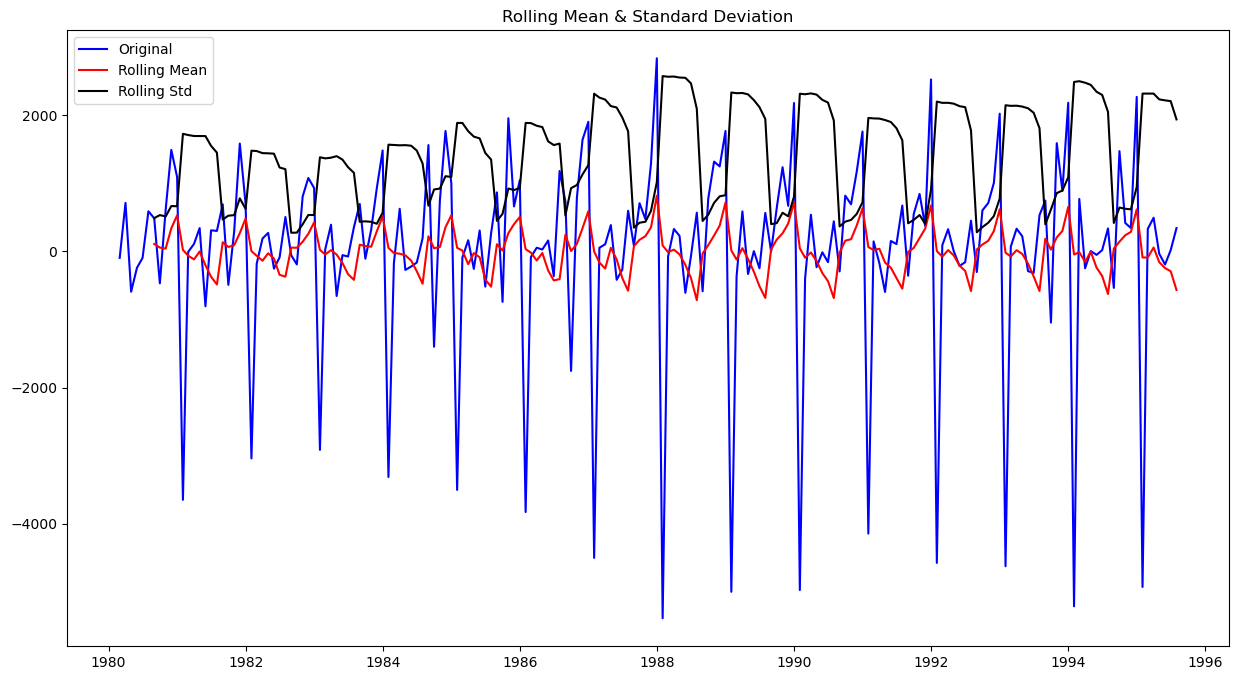

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [91]:
test_stationarity(df_sparkling['Sparkling'].diff().dropna())

## MODEL BUILDING - STATIONARY DATA (SPARKLING)

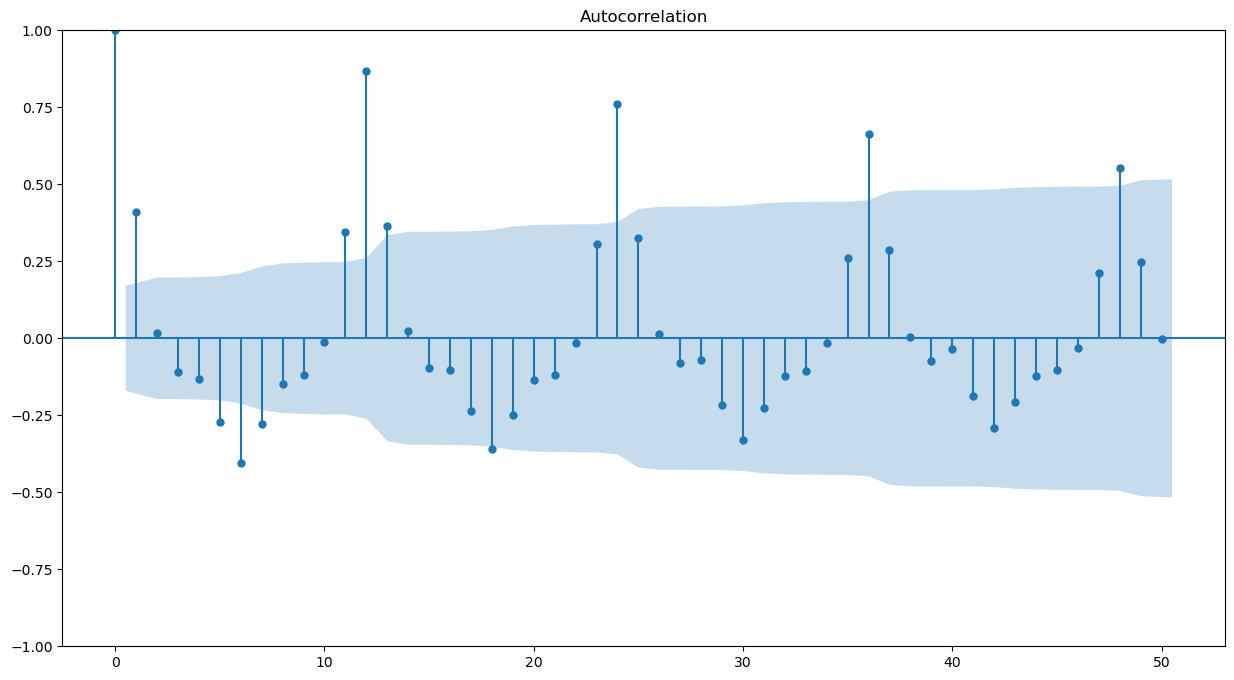

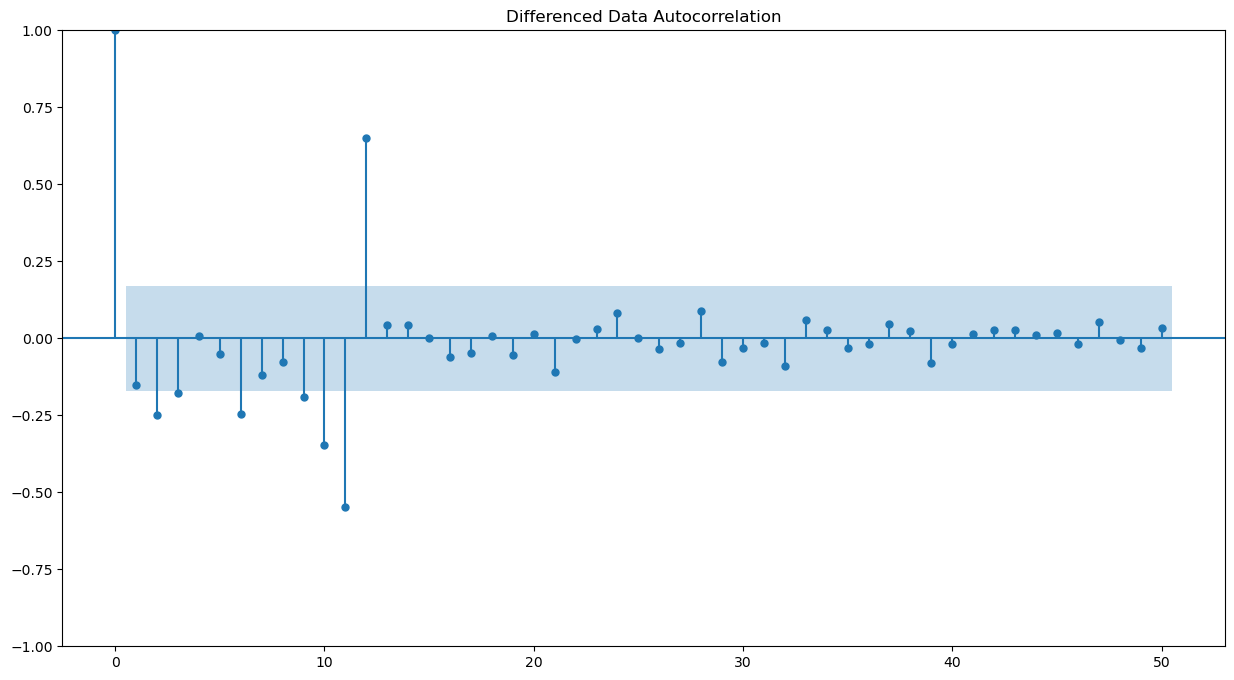

In [93]:
# Plot ACF (AutoCorrelation Function) for the given time series data
plot_acf(train['Sparkling'], lags=50)  # Replace 'train['Sparkling']' with your actual data series

# Plot PACF (Partial AutoCorrelation Function) for the given time series data
plot_pacf(train['Sparkling'].diff().dropna(), lags=50, title='Differenced Data Autocorrelation')  # Replace 'train['Sparkling']' with your actual data series

# Show the plots
plt.show()

In [94]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 5
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [95]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [96]:
for param in pdq:
    # Fitting the ARIMA model
    ARIMA_model = ARIMA(train['Sparkling'].values, order=param).fit()
    
    # Printing the parameters and AIC
    print(f'ARIMA{param} - AIC:{ARIMA_model.aic}')
    
    # Creating a temporary DataFrame for the current iteration
    temp_df = pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})
    
    # Concatenating the temporary DataFrame with ARIMA_AIC
    ARIMA_AIC = pd.concat([ARIMA_AIC, temp_df], ignore_index=True)

# Now, ARIMA_AIC contains the results

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323132153
ARIMA(0, 1, 3) - AIC:2233.9948577454234
ARIMA(0, 1, 4) - AIC:2235.173736469055
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673378
ARIMA(1, 1, 2) - AIC:2234.527200451783
ARIMA(1, 1, 3) - AIC:2235.607813201297
ARIMA(1, 1, 4) - AIC:2227.7369768148483
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.7776263084434
ARIMA(2, 1, 2) - AIC:2213.5092125299816
ARIMA(2, 1, 3) - AIC:2232.8807090462965
ARIMA(2, 1, 4) - AIC:2222.921832366368
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.4989261087767
ARIMA(3, 1, 2) - AIC:2230.7759852552135
ARIMA(3, 1, 3) - AIC:2221.436801003937
ARIMA(3, 1, 4) - AIC:2220.209573902643
ARIMA(4, 1, 0) - AIC:2259.741841399268
ARIMA(4, 1, 1) - AIC:2237.0730536530045
ARIMA(4, 1, 2) - AIC:2233.0767253205695
ARIMA(4, 1, 3) - AIC:2222.904096403955
ARIMA(4, 1, 4) - AIC:2214.0596169355263


In [97]:
# sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
12  (2, 1, 2)  2213.509213
24  (4, 1, 4)  2214.059617
19  (3, 1, 4)  2220.209574
18  (3, 1, 3)  2221.436801
23  (4, 1, 3)  2222.904096
14  (2, 1, 4)  2222.921832
9   (1, 1, 4)  2227.736977
17  (3, 1, 2)  2230.775985
13  (2, 1, 3)  2232.880709
22  (4, 1, 2)  2233.076725
11  (2, 1, 1)  2233.777626
3   (0, 1, 3)  2233.994858
2   (0, 1, 2)  2234.408323
7   (1, 1, 2)  2234.527200
4   (0, 1, 4)  2235.173736
16  (3, 1, 1)  2235.498926
8   (1, 1, 3)  2235.607813
6   (1, 1, 1)  2235.755095
21  (4, 1, 1)  2237.073054
15  (3, 1, 0)  2257.723379
20  (4, 1, 0)  2259.741841
10  (2, 1, 0)  2260.365744
1   (0, 1, 1)  2263.060016
5   (1, 1, 0)  2266.608539
0   (0, 1, 0)  2267.663036

In [98]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 16 Mar 2025   AIC                           2213.509
Time:                        12:50:53   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

In [99]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Sparkling'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

1299.9797563580828


In [100]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Simple Average                                      1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha =0.0395,SimpleExponentialSmoothing            1304.927405
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1418.407668
Alpha=0.111,Beta=0.0495,Gamma=0.362,Triple Expo...   404.286809
Alpha=0.40,Beta=0.10,Gamma=0.20,Triple Exponent...   317.434302
Auto_ARIMA                                          1299.979756

In [101]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(2,1,1),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1112.889
Date:                Sun, 16 Mar 2025   AIC                           2233.778
Time:                        12:50:53   BIC                           2245.278
Sample:                    01-31-1980   HQIC                          2238.451
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5194      0.119      4.359      0.000       0.286       0.753
ar.L2         -0.1782      0.196     -0.908      0.364      -0.563       0.206
ma.L1         -0.9993      0.667     -1.499      0.1

In [102]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

predicted_manual_ARIMA

1991-01-31    3957.667270
1991-02-28    2558.511407
1991-03-31    2204.093443
1991-04-30    2269.356341
1991-05-31    2366.423290
1991-06-30    2405.213100
1991-07-31    2408.062639
1991-08-31    2402.629507
1991-09-30    2399.299413
1991-10-31    2398.537921
1991-11-30    2398.735872
1991-12-31    2398.974414
1992-01-31    2399.063045
1992-02-29    2399.066570
1992-03-31    2399.052604
1992-04-30    2399.044722
1992-05-31    2399.043116
1992-06-30    2399.043687
1992-07-31    2399.044270
1992-08-31    2399.044471
1992-09-30    2399.044471
1992-10-31    2399.044436
1992-11-30    2399.044417
1992-12-31    2399.044414
1993-01-31    2399.044416
1993-02-28    2399.044417
1993-03-31    2399.044417
1993-04-30    2399.044417
1993-05-31    2399.044417
1993-06-30    2399.044417
1993-07-31    2399.044417
1993-08-31    2399.044417
1993-09-30    2399.044417
1993-10-31    2399.044417
1993-11-30    2399.044417
1993-12-31    2399.044417
1994-01-31    2399.044417
1994-02-28    2399.044417
1994-03-31  

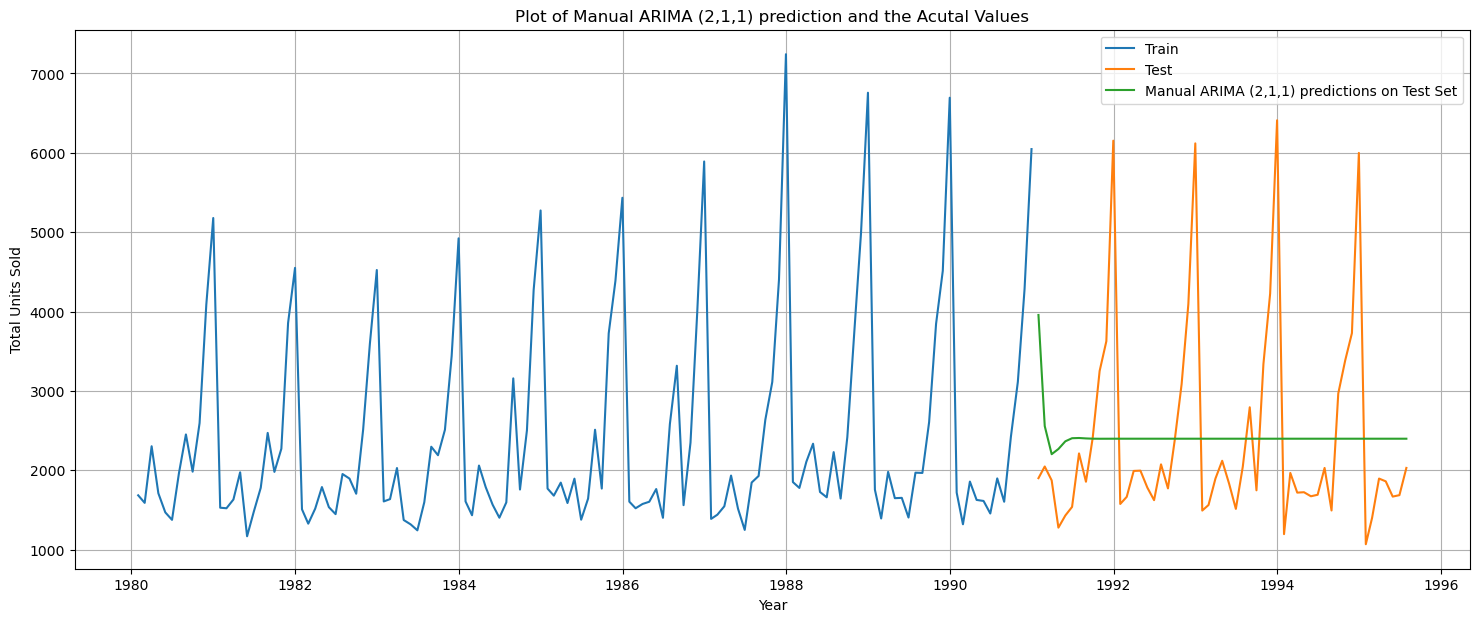

In [103]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,7))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_manual_ARIMA, label='Manual ARIMA (2,1,1) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual ARIMA (2,1,1) prediction and the Acutal Values');
plt.xlabel('Year')
plt.ylabel('Total Units Sold');

In [104]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)

print('RMSE:',rmse)

RMSE: 1300.7213820120776


In [105]:
results2 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Manual ARIMA (2,1,1)'])
                                   
resultsDf = pd.concat([resultsDf, results2])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Simple Average                                      1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha =0.0395,SimpleExponentialSmoothing            1304.927405
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1418.407668
Alpha=0.111,Beta=0.0495,Gamma=0.362,Triple Expo...   404.286809
Alpha=0.40,Beta=0.10,Gamma=0.20,Triple Exponent...   317.434302
Auto_ARIMA                                          1299.979756
Manual ARIMA (2,1,1)                                1300.721382

In [106]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(0,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 0)(0, 0, 0, 12)
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [109]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [110]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        # Create and fit the SARIMA model
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                                 order=param,
                                                 seasonal_order=param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        # Print the model's AIC
        print(f'SARIMA{param}x{param_seasonal} - AIC:{results_SARIMA.aic}')
        
        # Create a temporary DataFrame for the current iteration's results
        temp_df = pd.DataFrame({'param': [param], 
                                'seasonal': [param_seasonal], 
                                'AIC': [results_SARIMA.aic]})
        
        # Concatenate the results into the SARIMA_AIC DataFrame
        SARIMA_AIC = pd.concat([SARIMA_AIC, temp_df], ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844612
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640235991
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:7226.806331331496
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389667
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791614
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:6627.675476242242
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158609058
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920833
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3474.6645491859836
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308408
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.18710526258
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530065073
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3461.051516267725
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850585
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566314
SARIMA(0, 1, 1)x

In [111]:
SARIMA_AIC.sort_values(by=['AIC']).head(20)

param       seasonal          AIC
167  (2, 1, 2)  (1, 0, 3, 12)    18.000000
119  (1, 1, 3)  (1, 0, 3, 12)    18.000000
179  (2, 1, 3)  (0, 0, 3, 12)    18.000000
155  (2, 1, 1)  (2, 0, 3, 12)    18.000000
219  (3, 1, 1)  (2, 0, 3, 12)    20.000000
171  (2, 1, 2)  (2, 0, 3, 12)    20.000000
187  (2, 1, 3)  (2, 0, 3, 12)    22.000000
43   (0, 1, 2)  (2, 0, 3, 12)    94.809695
211  (3, 1, 1)  (0, 0, 3, 12)   243.808127
51   (0, 1, 3)  (0, 0, 3, 12)  1096.869990
236  (3, 1, 2)  (3, 0, 0, 12)  1387.234722
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788331
254  (3, 1, 3)  (3, 0, 2, 12)  1388.262968
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602614
221  (3, 1, 1)  (3, 0, 1, 12)  1388.681486
252  (3, 1, 3)  (3, 0, 0, 12)  1389.142089
222  (3, 1, 1)  (3, 0, 2, 12)  1389.195908
238  (3, 1, 2)  (3, 0, 2, 12)  1389.714485
253  (3, 1, 3)  (3, 0, 1, 12)  1393.682985
204  (3, 1, 0)  (3, 0, 0, 12)  1396.867862

In [112]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3, 1, 2),
                                seasonal_order=(3, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 0, [1], 12)   Log Likelihood                -684.301
Date:                              Sun, 16 Mar 2025   AIC                           1388.603
Time:                                      12:56:14   BIC                           1413.820
Sample:                                  01-31-1980   HQIC                          1398.781
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5431      0.416     -1.305      0.192      -1.359       0.272
ar.L2         -0.00

In [113]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))
predicted_auto_SARIMA.predicted_mean

1991-01-31    1320.327128
1991-02-28    1298.570394
1991-03-31    1604.572130
1991-04-30    1626.083355
1991-05-31    1398.005506
1991-06-30    1237.794264
1991-07-31    1785.923254
1991-08-31    1510.309172
1991-09-30    2285.999277
1991-10-31    3290.912440
1991-11-30    4452.066939
1991-12-31    6491.432095
1992-01-31    1295.958394
1992-02-29    1101.860911
1992-03-31    1546.581903
1992-04-30    1443.851742
1992-05-31    1283.029092
1992-06-30    1094.940288
1992-07-31    1662.351353
1992-08-31    1419.773391
1992-09-30    2214.776448
1992-10-31    3277.913005
1992-11-30    4411.883955
1992-12-31    6549.147988
1993-01-31    1180.481357
1993-02-28     959.149917
1993-03-31    1427.770907
1993-04-30    1310.729841
1993-05-31    1160.513382
1993-06-30     971.236281
1993-07-31    1543.179419
1993-08-31    1275.634378
1993-09-30    2113.064227
1993-10-31    3158.261767
1993-11-30    4359.028856
1993-12-31    6527.571934
1994-01-31    1018.922902
1994-02-28     824.552871
1994-03-31  

Text(0, 0.5, 'Total Units Sold')

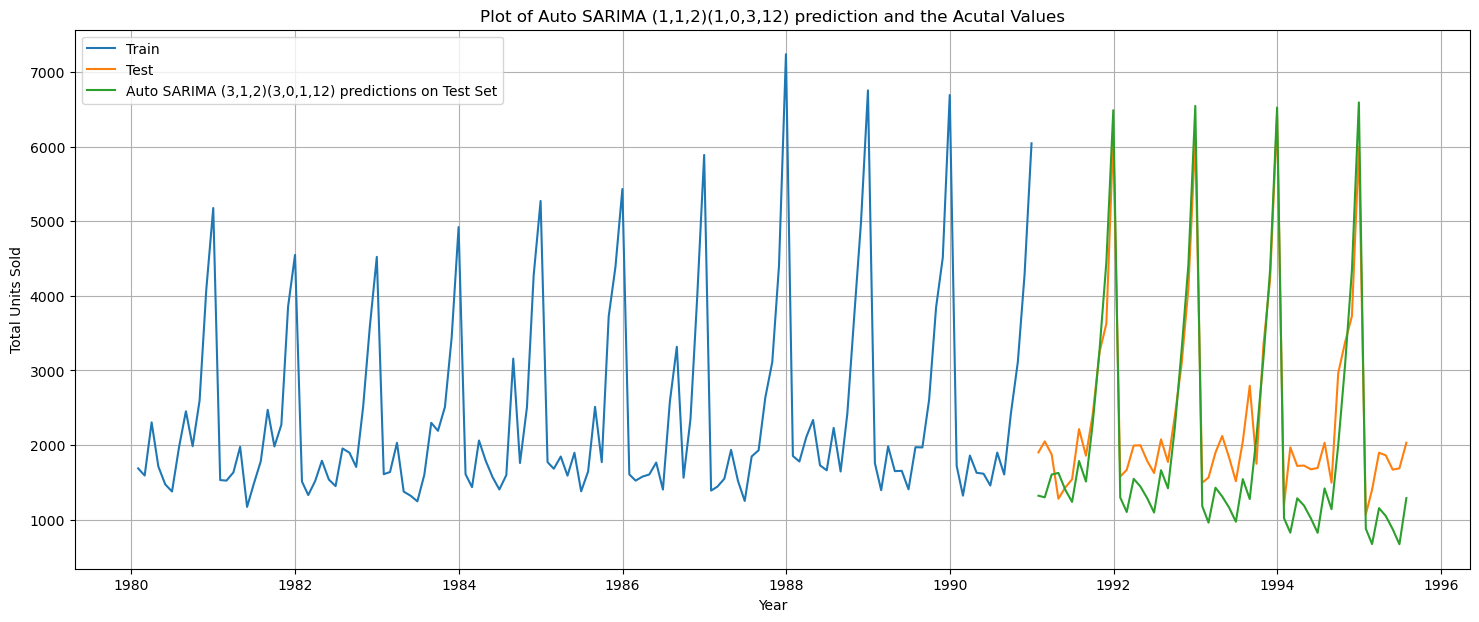

In [114]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,7))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_auto_SARIMA.predicted_mean, label='Auto SARIMA (3,1,2)(3,0,1,12) predictions on Test Set')
plt.legend(loc='best')
plt.grid();
plt.title('Plot of Auto SARIMA (1,1,2)(1,0,3,12) prediction and the Acutal Values');
plt.xlabel('Year')
plt.ylabel('Total Units Sold')

In [115]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)

print('RMSE:',rmse)

RMSE: 579.8741040287225


In [116]:
results3 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto SARIMA (3,1,2)(3,0,1,12)'])
                                   
resultsDf = pd.concat([resultsDf, results3])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Simple Average                                      1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha =0.0395,SimpleExponentialSmoothing            1304.927405
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1418.407668
Alpha=0.111,Beta=0.0495,Gamma=0.362,Triple Expo...   404.286809
Alpha=0.40,Beta=0.10,Gamma=0.20,Triple Exponent...   317.434302
Auto_ARIMA                                          1299.979756
Manual ARIMA (2,1,1)                                1300.721382
Auto SARIMA (3,1,2)(3,0,1,12)                        579.874104

In [117]:
# build manual sarima model
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(4,1,2),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -771.377
Date:                              Sun, 16 Mar 2025   AIC                           1558.755
Time:                                      12:56:15   BIC                           1579.910
Sample:                                  01-31-1980   HQIC                          1567.325
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1794      0.593     -0.303      0.762      -1.341       0.982
ar.L2         -0.08

In [118]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA.predicted_mean

1991-01-31    1431.533474
1991-02-28    1348.285621
1991-03-31    1722.376273
1991-04-30    1621.894698
1991-05-31    1476.368247
1991-06-30    1255.605833
1991-07-31    1798.109290
1991-08-31    1612.943575
1991-09-30    2267.716816
1991-10-31    3183.848943
1991-11-30    4248.328098
1991-12-31    6166.342382
1992-01-31    1398.916118
1992-02-29    1206.054897
1992-03-31    1632.933765
1992-04-30    1503.833499
1992-05-31    1381.727466
1992-06-30    1178.098059
1992-07-31    1706.372146
1992-08-31    1527.412148
1992-09-30    2178.777581
1992-10-31    3091.927190
1992-11-30    4159.672717
1992-12-31    6076.277621
1993-01-31    1309.327002
1993-02-28    1117.048848
1993-03-31    1543.222555
1993-04-30    1414.438268
1993-05-31    1292.268806
1993-06-30    1088.515420
1993-07-31    1616.938273
1993-08-31    1437.909338
1993-09-30    2089.282511
1993-10-31    3002.459640
1993-11-30    4070.173976
1993-12-31    5986.793538
1994-01-31    1219.842197
1994-02-28    1027.557845
1994-03-31  

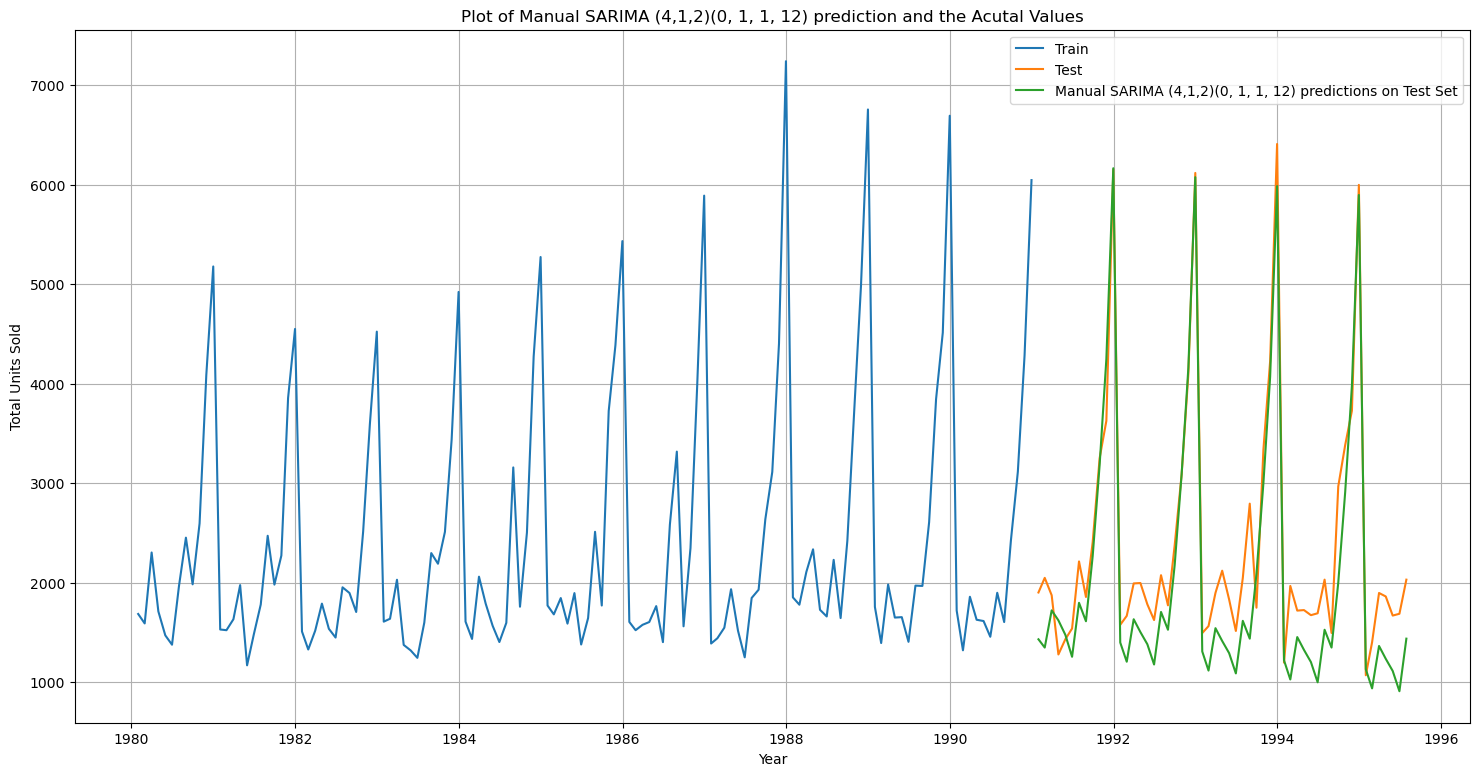

In [119]:
# plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual SARIMA (4,1,2)(0, 1, 1, 12) prediction and the Acutal Values');
plt.xlabel('Year')
plt.ylabel('Total Units Sold');

In [120]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
print('RMSE:',rmse)

RMSE: 468.6816437437356


In [121]:
results4 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Manual SARIMA (4, 1, 2)(0, 1, 1, 12)'])
                                   
resultsDf = pd.concat([resultsDf, results4])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Simple Average                                      1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha =0.0395,SimpleExponentialSmoothing            1304.927405
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1418.407668
Alpha=0.111,Beta=0.0495,Gamma=0.362,Triple Expo...   404.286809
Alpha=0.40,Beta=0.10,Gamma=0.20,Triple Exponent...   317.434302
Auto_ARIMA                                          1299.979756
Manual ARIMA (2,1,1)                                1300.721382
Auto SARIMA (3,1,2)(3,0,1,12)                        579.874104
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                 468.681644

In [122]:
#Combining the tables which contained the exponential smoothing models and ARIMA/SARIMA into one
resultsDf_Final = pd.concat([resultsDf,results4])

resultsDf_Final

Test RMSE
Linear Regression                                   1389.135175
Simple Average                                      1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha =0.0395,SimpleExponentialSmoothing            1304.927405
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1418.407668
Alpha=0.111,Beta=0.0495,Gamma=0.362,Triple Expo...   404.286809
Alpha=0.40,Beta=0.10,Gamma=0.20,Triple Exponent...   317.434302
Auto_ARIMA                                          1299.979756
Manual ARIMA (2,1,1)                                1300.721382
Auto SARIMA (3,1,2)(3,0,1,12)                        579.874104
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                 468.681644
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                 468.681644

In [123]:
resultsDf_Final.sort_values(by='Test RMSE',ascending=True)

Test RMSE
Alpha=0.40,Beta=0.10,Gamma=0.20,Triple Exponent...   317.434302
Alpha=0.111,Beta=0.0495,Gamma=0.362,Triple Expo...   404.286809
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                 468.681644
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                 468.681644
Auto SARIMA (3,1,2)(3,0,1,12)                        579.874104
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Simple Average                                      1275.081804
6pointTrailingMovingAverage                         1283.927428
Auto_ARIMA                                          1299.979756
Manual ARIMA (2,1,1)                                1300.721382
Alpha =0.0395,SimpleExponentialSmoothing            1304.927405
9pointTrailingMovingAverage                         1346.278315
Linear Regression                                   1389.135175
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1418.407668

Text(0, 0.5, 'Total Units Sold')

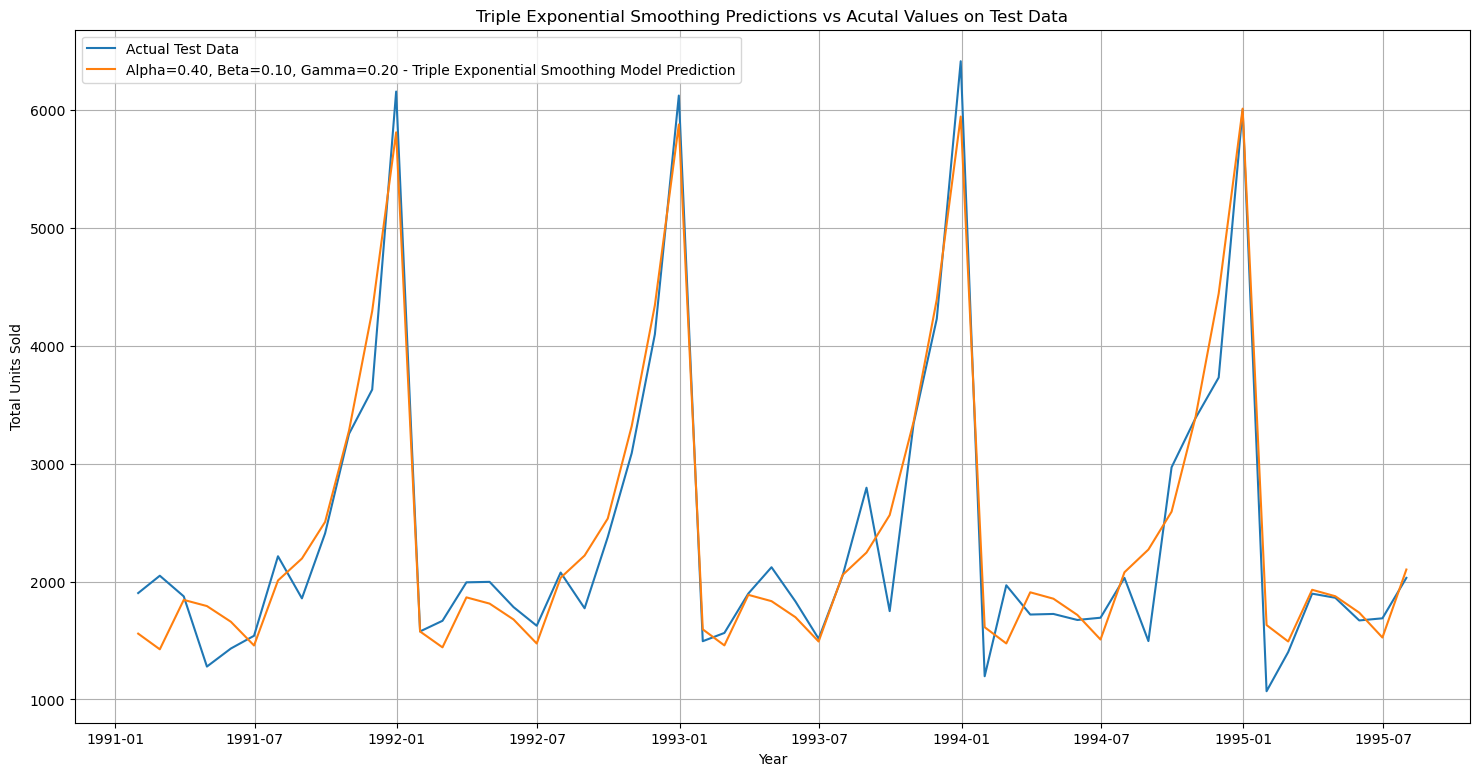

In [124]:
## Plotting on both the Training data

plt.figure(figsize=(18,9))
plt.plot(test['Sparkling'], label='Actual Test Data')

plt.plot(TES_test['predict', 0.40,0.10,0.20], label='Alpha=0.40, Beta=0.10, Gamma=0.20 - Triple Exponential Smoothing Model Prediction')

plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Predictions vs Acutal Values on Test Data');
plt.xlabel('Year')
plt.ylabel('Total Units Sold')

Text(0, 0.5, 'Total Units Sold')

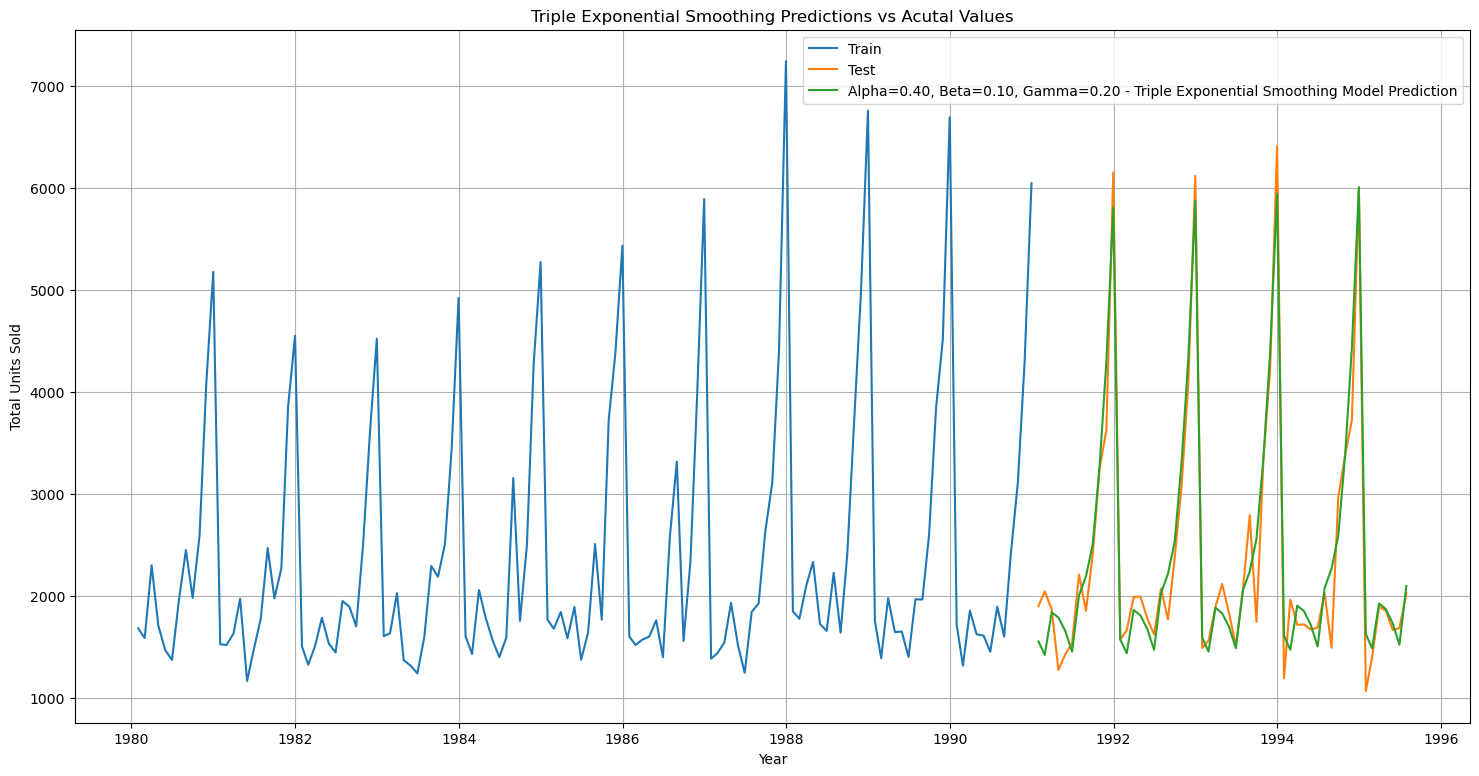

In [125]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(TES_test['predict', 0.40,0.10,0.20], label='Alpha=0.40, Beta=0.10, Gamma=0.20 - Triple Exponential Smoothing Model Prediction')

plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Predictions vs Acutal Values');
plt.xlabel('Year')
plt.ylabel('Total Units Sold')

In [126]:
TES_Fullmodel = ExponentialSmoothing(df_sparkling['Sparkling'],trend='additive',seasonal='multiplicative',freq='M').fit(smoothing_level=0.40, smoothing_trend=0.10, smoothing_seasonal=0.20)

TES_Fullmodel.params

{'smoothing_level': 0.4,
 'smoothing_trend': 0.1,
 'smoothing_seasonal': 0.2,
 'damping_trend': nan,
 'initial_level': 2387.1289559939423,
 'initial_trend': -15.205293679598146,
 'initial_seasons': array([0.72197695, 0.69053053, 0.89489038, 0.80637673, 0.6904122 ,
        0.67169472, 0.91604133, 1.18843675, 1.02668664, 1.38378087,
        2.03408305, 2.66757148]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [127]:
RMSE_fullmodel = metrics.mean_squared_error(df_sparkling['Sparkling'],TES_Fullmodel.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel)

RMSE: 376.7746175142995


In [128]:
# Getting the predictions for the 12 months into the future
prediction = TES_Fullmodel.forecast(steps=12)
print('Forecast of next 12 months')
prediction.tail(12)

Forecast of next 12 months


1995-08-31    2063.448803
1995-09-30    2579.407389
1995-10-31    3416.654268
1995-11-30    4304.477169
1995-12-31    6604.876647
1996-01-31    1564.539777
1996-02-29    1849.759980
1996-03-31    2098.878830
1996-04-30    2022.428830
1996-05-31    1834.540687
1996-06-30    1712.408933
1996-07-31    2176.425361
Freq: ME, dtype: float64

Text(0, 0.5, 'Total Units Sold')

<Figure size 1800x900 with 0 Axes>

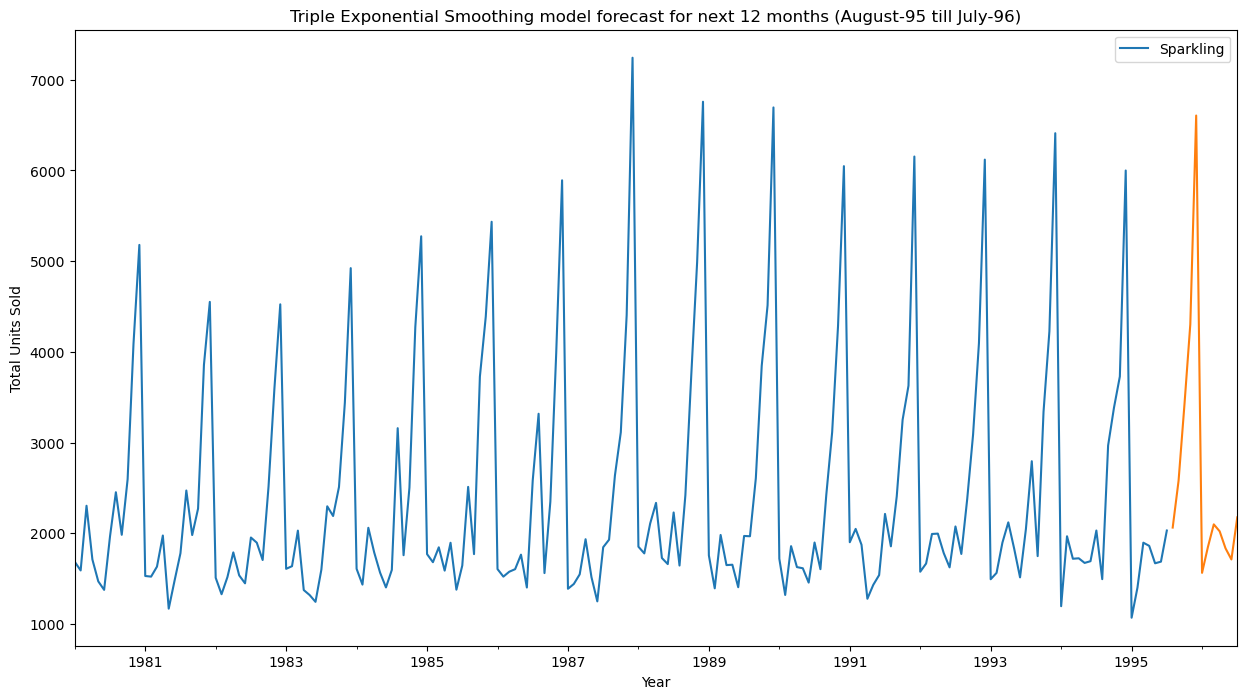

In [129]:
plt.figure(figsize=(18,9))
df_sparkling.plot()
prediction.plot();
plt.title('Triple Exponential Smoothing model forecast for next 12 months (August-95 till July-96)')
plt.xlabel('Year')
plt.ylabel('Total Units Sold')

## EDA (ROSE)

In [131]:
# reading the sparkling data as time series data
Time_Rose= pd.date_range(start='1/1/1980',end='8/1/1995',freq='M')
Time_Rose

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='ME')

In [132]:
df_rose['Time_Rose'] = Time_Rose

In [133]:
df_rose.set_index(keys='Time_Rose', inplace=True)
df_rose.drop(['YearMonth'], axis=1, inplace=True)
df_rose.head()

Rose
Time_Rose        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

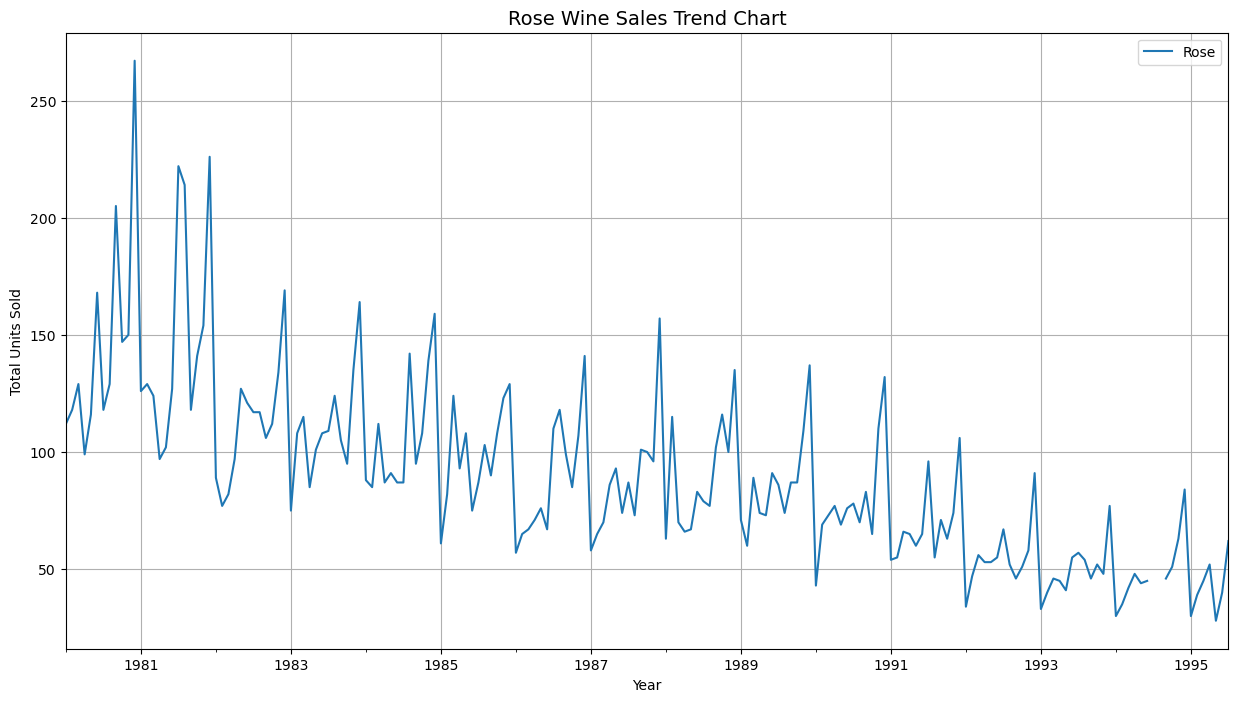

In [134]:
rcParams['figure.figsize'] = 15,8
df_rose.plot(grid=True);
plt.title('Rose Wine Sales Trend Chart', fontsize=14)
plt.xlabel('Year',fontsize=10)
plt.ylabel('Total Units Sold',fontsize=10);

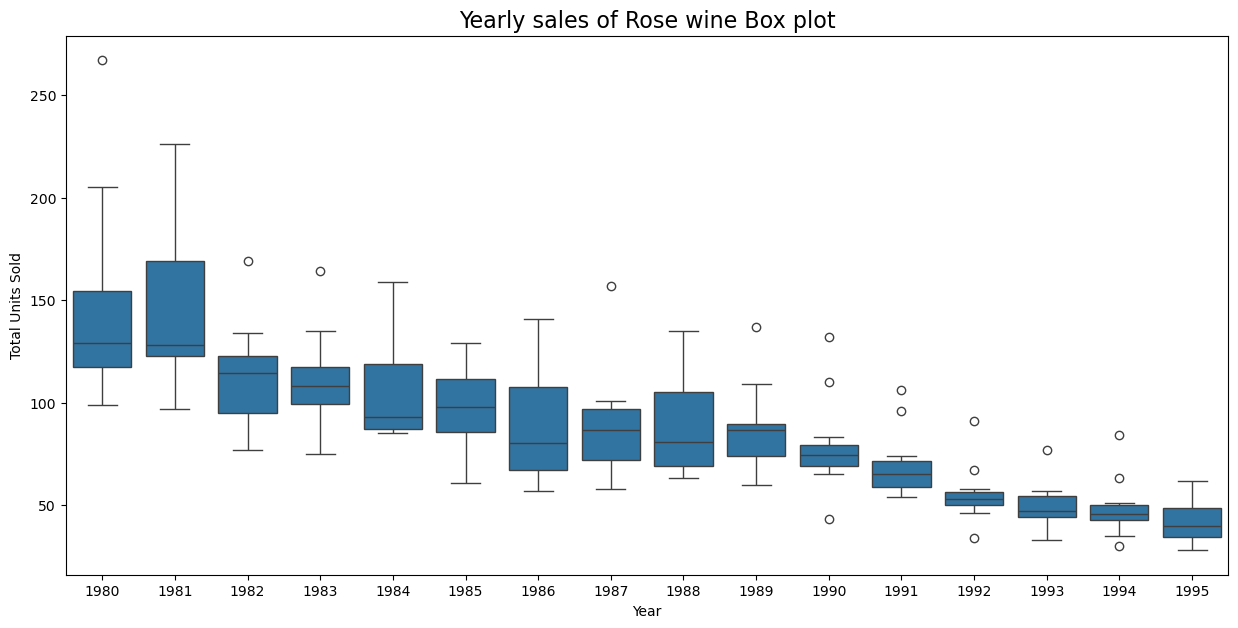

In [135]:
# boxplot of yearly sales
plt.figure(figsize = (15, 7))
sns.boxplot(x = df_rose.index.year,y = df_rose.values[:,0])
plt.title('Yearly sales of Rose wine Box plot', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Units Sold');

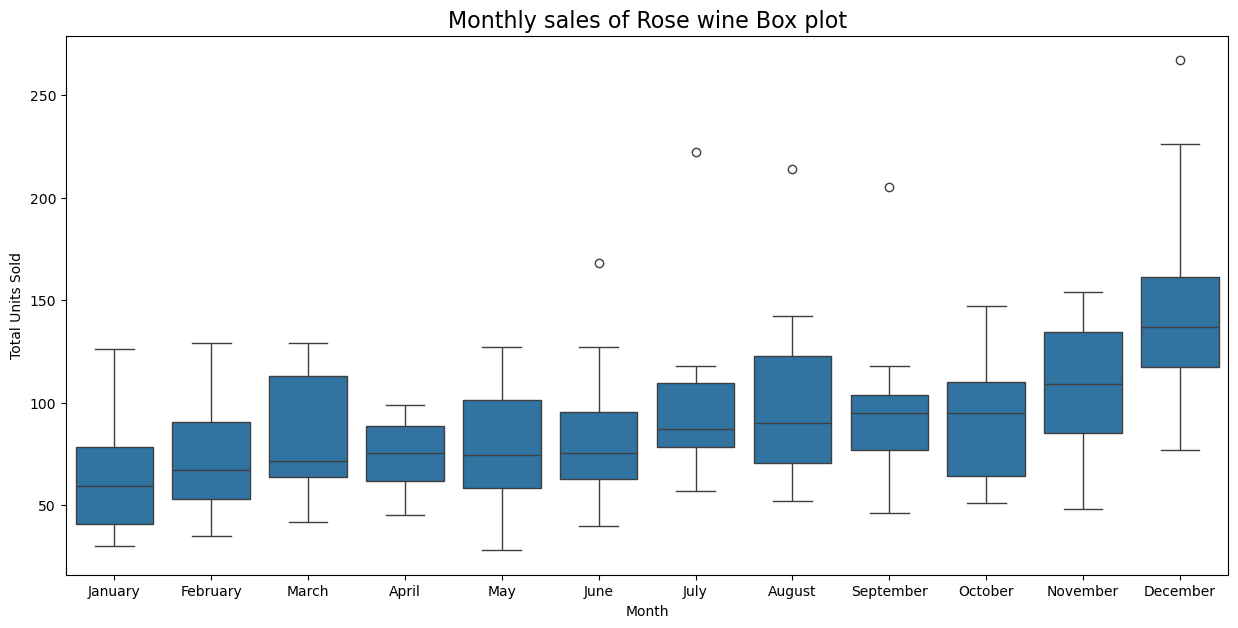

In [136]:
# boxplot of yearly sales
plt.figure(figsize = (15, 7))
sns.boxplot(x = df_rose.index.month_name(),y = df_rose.values[:,0])
plt.title('Monthly sales of Rose wine Box plot', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Units Sold');

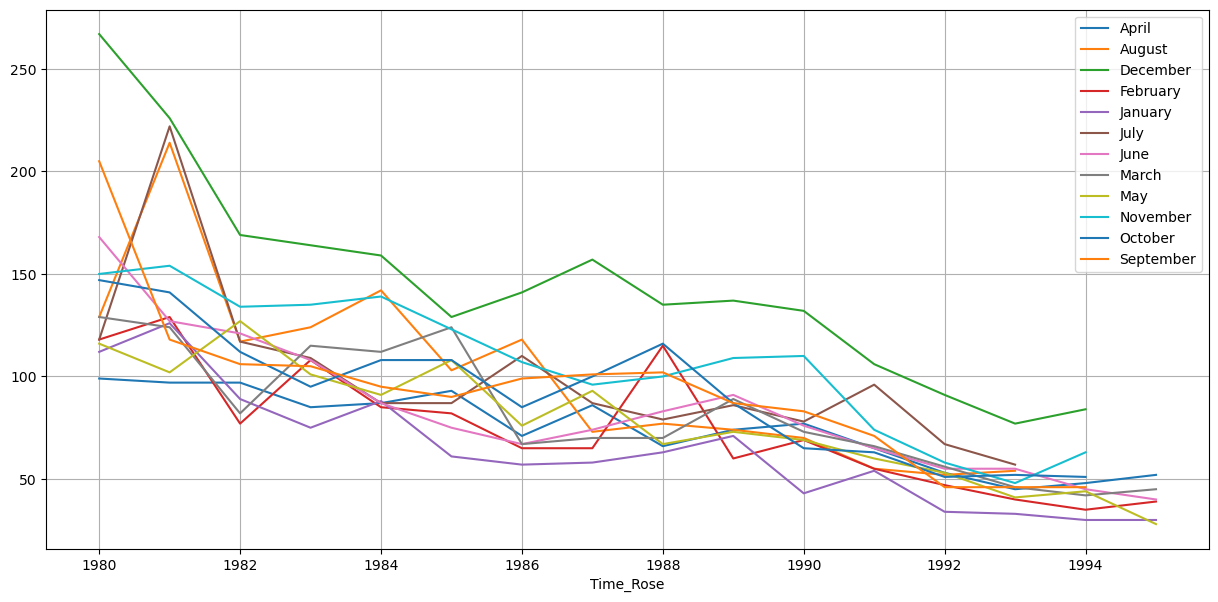

In [137]:
# trend of monthly sales across years
monthly_sales_across_years2 = pd.pivot_table(df_rose, values = 'Rose', columns = df_rose.index.month_name(), index = df_rose.index.year)
monthly_sales_across_years2.plot(figsize=(15,7))
plt.grid()
plt.legend(loc='best');

In [138]:
# handling missing values
df_rose[df_rose['Rose'].isna()]

Rose
Time_Rose       
1994-07-31   NaN
1994-08-31   NaN

In [139]:
df_rose.interpolate(inplace=True)

In [142]:
df_rose.isnull().sum()

Rose    0
dtype: int64

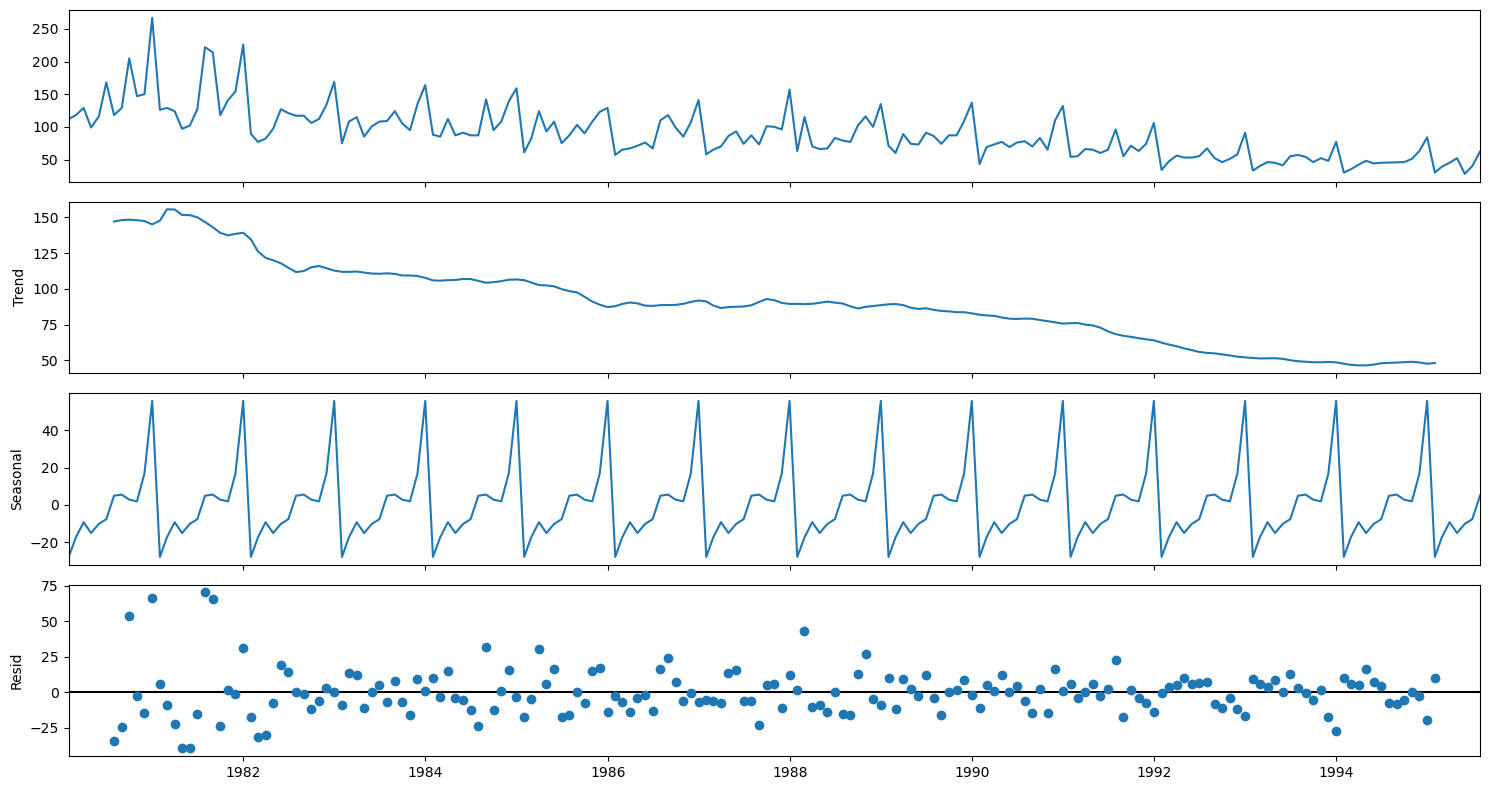

In [143]:
# decomposition (additive model)
decomposition2 = seasonal_decompose(df_rose,model='additive')
decomposition2.plot();

In [144]:
trend = decomposition2.trend
seasonality = decomposition2.seasonal
residual = decomposition2.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Rose
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Rose
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Name: seasonal, dtype: float64 

Residual 
 Time_Rose
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.16142

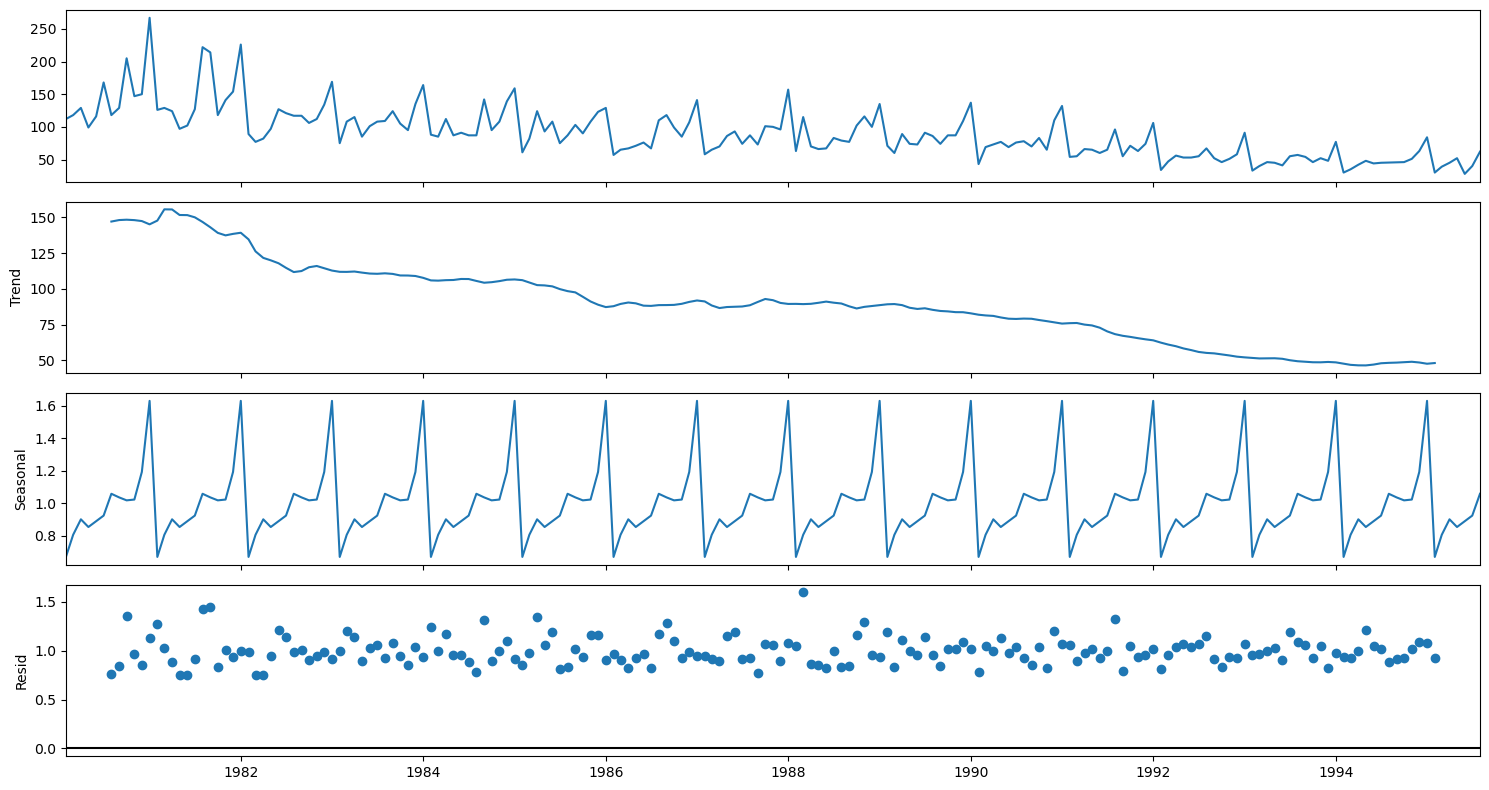

In [145]:
# decomposition (multiplicative model)
decomposition2 = seasonal_decompose(df_rose,model='multiplicative')
decomposition2.plot();

In [146]:
trend = decomposition2.trend
seasonality = decomposition2.seasonal
residual = decomposition2.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Rose
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Rose
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 Time_Rose
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype: fl

## DATA PREPROCESSING (ROSE)

In [148]:
train = df_rose[df_rose.index.year < 1991]
test = df_rose[df_rose.index.year >= 1991]

In [150]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (132, 1)
test dataset:  (55, 1) 

Rows of dataset: 
First few rows of Training Data 
              Rose
Time_Rose        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0 

Last few rows of Training Data 
              Rose
Time_Rose        
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0 

First few rows of Test Data 
             Rose
Time_Rose       
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0 

Last few rows of Test Data 
             Rose
Time_Rose       
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0 



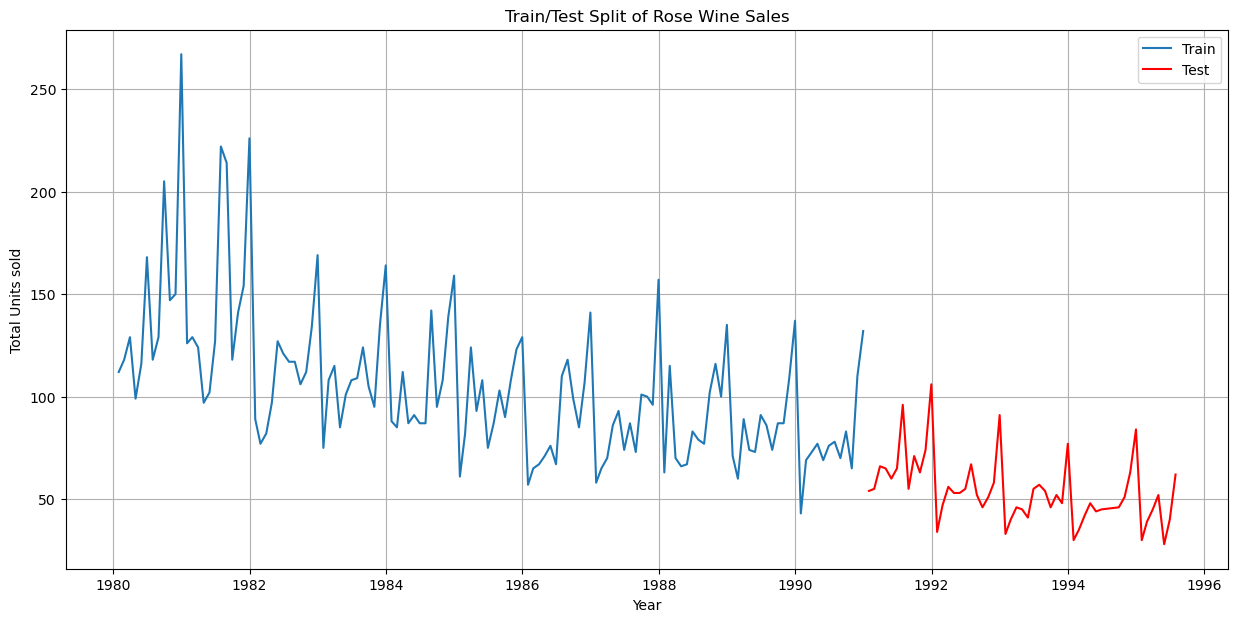

In [151]:
plt.figure(figsize = (15, 7))
plt.plot(train['Rose'], label = 'Train')
plt.plot(test['Rose'], label = 'Test', color='Red')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Total Units sold')
plt.title('Train/Test Split of Rose Wine Sales', fontsize = 12)
plt.show;
plt.grid();

## MODEL BUILDING (ROSE)

In [153]:
# generating the numerical time instance order for both the training and test set.
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('\n')
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [154]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [156]:
LinearRegression_train['Time'] = train_time
LinearRegression_test['Time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  Time
Time_Rose              
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  Time
Time_Rose              
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  Time
Time_Rose             
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  Time
Time_Rose             
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [157]:
lr = LinearRegression()

In [159]:
lr.fit(LinearRegression_train[['Time']],LinearRegression_train['Rose'].values)

LinearRegression()

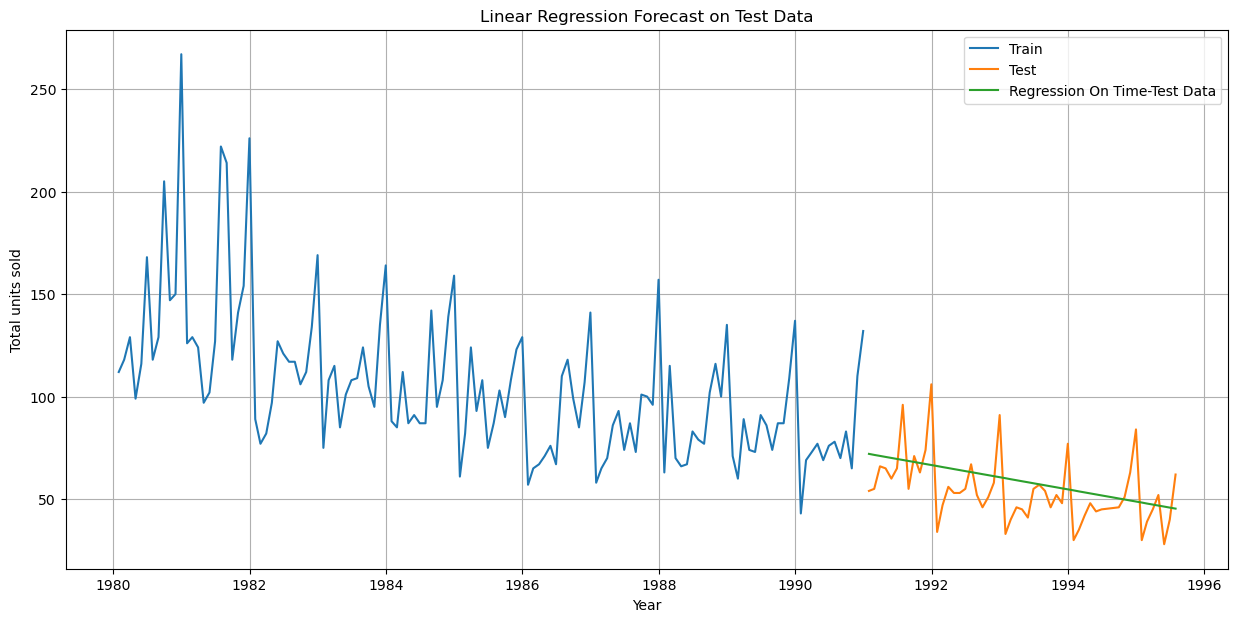

In [160]:
test_predictions_model1 = lr.predict(LinearRegression_test[['Time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

train_predictions_model1 = lr.predict(LinearRegression_train[['Time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

plt.figure(figsize=(15,7))
plt.title('Linear Regression Forecast on Test Data')
plt.xlabel('Year')
plt.ylabel('Total units sold')
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time-Test Data')
plt.legend(loc='best')
plt.grid();

In [161]:
rmse_LR_test = metrics.mean_squared_error(test['Rose'],LinearRegression_test['RegOnTime'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_LR_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [162]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_LR_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  15.268955

In [163]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [165]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
Time_Rose                      
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

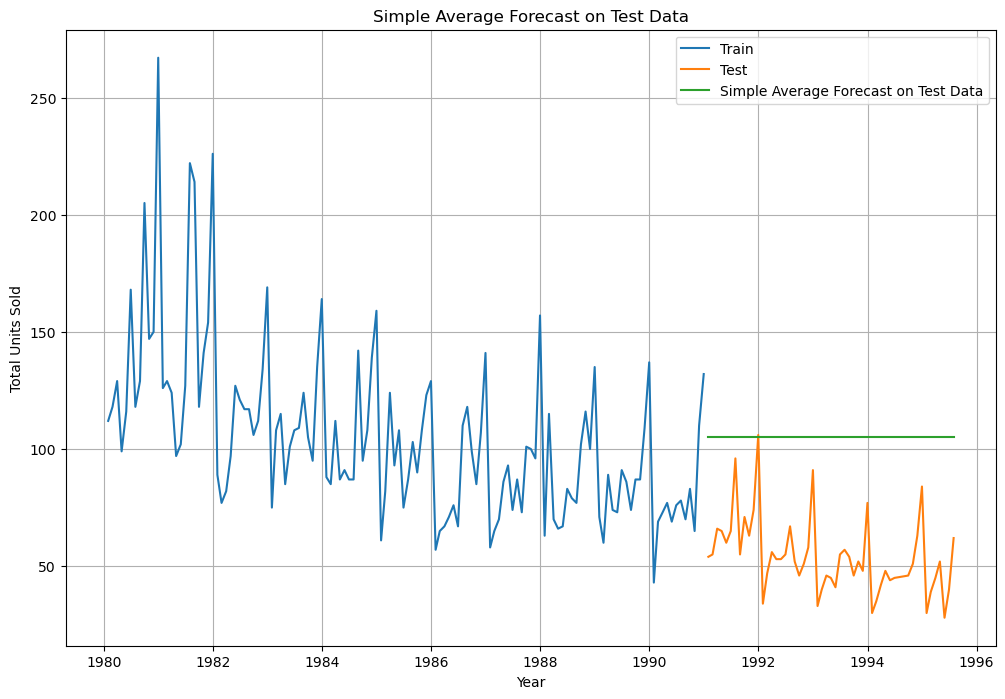

In [166]:
plt.figure(figsize=(12,8))
plt.title('Simple Average Forecast on Test Data')
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.grid();

In [168]:
## Test Data - RMSE 

rmse_simple_average_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_simple_average_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [169]:
resultsDf2 = pd.DataFrame({'Test RMSE': [rmse_simple_average_test]},index=['Simple Average'])

resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

Test RMSE
Linear Regression  15.268955
Simple Average     53.460570

In [170]:
MovingAverage = df_rose.copy()
MovingAverage.head()

Rose
Time_Rose        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [171]:
# trailing Moving Average
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head(9)

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Rose                                                        
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0      114.50         NaN         NaN
1980-05-31  116.0       107.5      115.50         NaN         NaN
1980-06-30  168.0       142.0      128.00  123.666667         NaN
1980-07-31  118.0       143.0      125.25  124.666667         NaN
1980-08-31  129.0       123.5      132.75  126.500000         NaN
1980-09-30  205.0       167.0      155.00  139.166667  132.666667

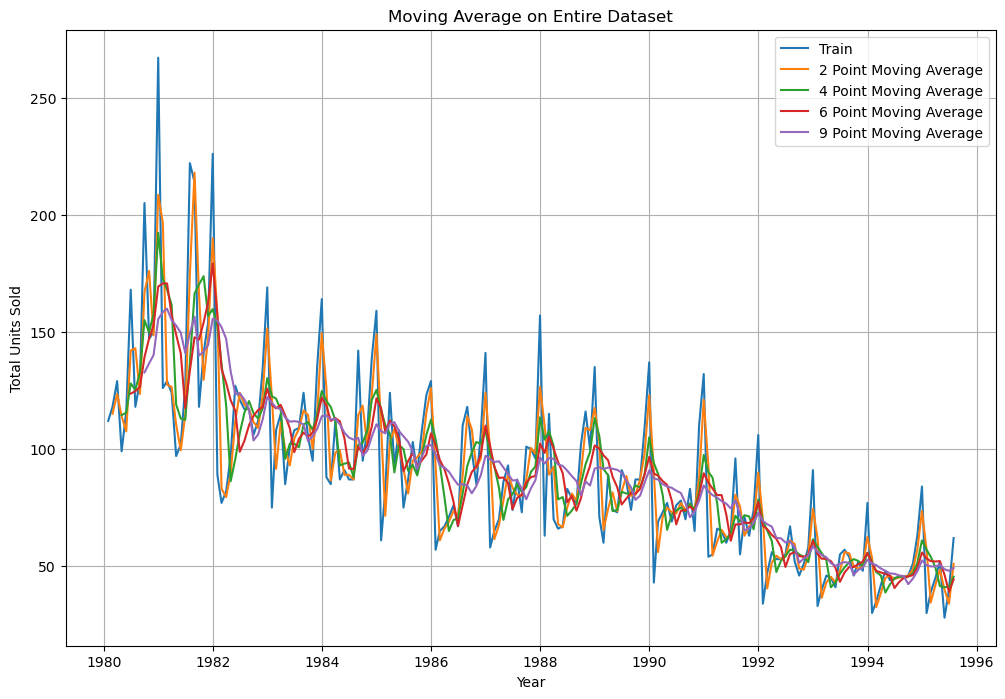

In [172]:
#Plotting on the whole data

plt.figure(figsize=(12,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.title('Moving Average on Entire Dataset')
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.legend(loc = 'best')
plt.grid();

In [173]:
# creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

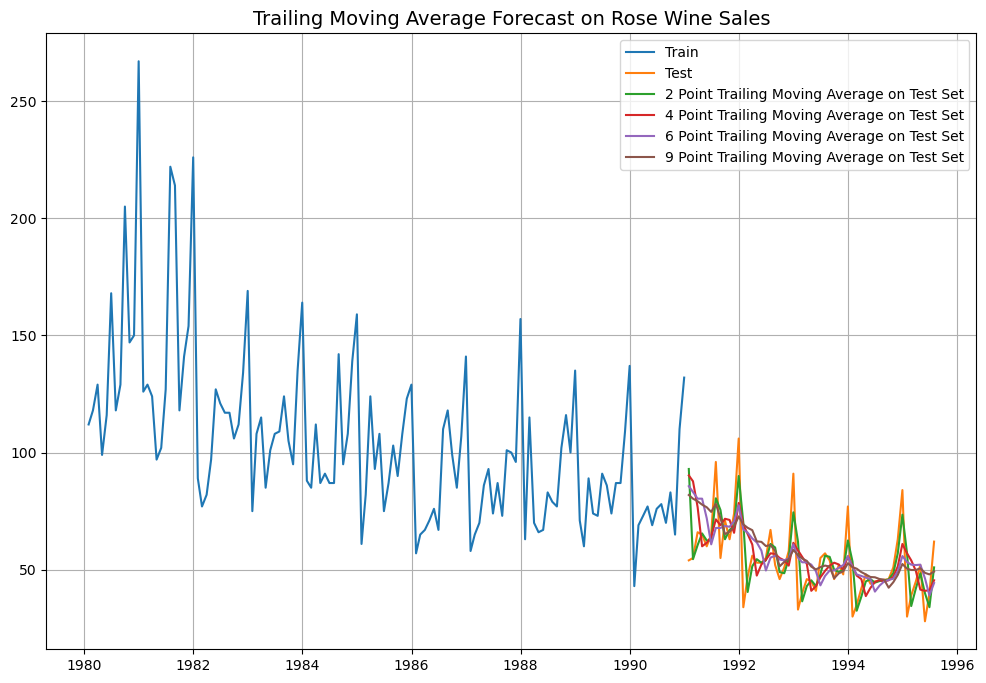

In [174]:
## Plotting on both the Training and Test data

plt.figure(figsize=(12,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.title("Trailing Moving Average Forecast on Rose Wine Sales", fontsize=14)
plt.legend(loc = 'best')
plt.grid();

In [175]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_MA_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_MA_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_MA_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_MA_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728


In [176]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_MA_test_2,rmse_MA_test_4
                                          ,rmse_MA_test_6,rmse_MA_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression            15.268955
Simple Average               53.460570
2pointTrailingMovingAverage  11.529278
4pointTrailingMovingAverage  14.451403
6pointTrailingMovingAverage  14.566327
9pointTrailingMovingAverage  14.727630

In [177]:
SES_train = train.copy()
SES_test = test.copy()

In [179]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [180]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [182]:
model_SES_autofit.params

{'smoothing_level': 0.12362013444181875,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [183]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
Time_Rose                  
1991-01-31  54.0  87.983765
1991-02-28  55.0  87.983765
1991-03-31  66.0  87.983765
1991-04-30  65.0  87.983765
1991-05-31  60.0  87.983765

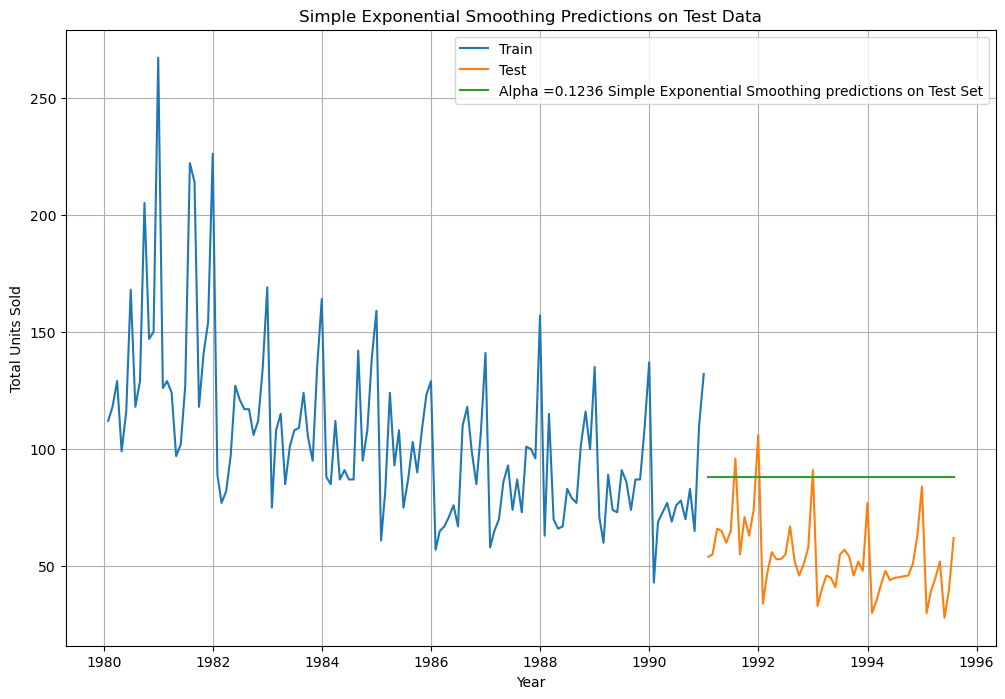

In [184]:
## Plotting on both the Training and Test data

plt.figure(figsize=(12,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.1236 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Predictions on Test Data');
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.grid();

In [185]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.1236 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.1236 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 37.592


In [186]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha =0.1236,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression                         15.268955
Simple Average                            53.460570
2pointTrailingMovingAverage               11.529278
4pointTrailingMovingAverage               14.451403
6pointTrailingMovingAverage               14.566327
9pointTrailingMovingAverage               14.727630
Alpha =0.1236,SimpleExponentialSmoothing  37.592212

In [188]:
DES_train = train.copy()
DES_test = test.copy()

In [189]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(DES_train['Rose'])

In [190]:
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

{'smoothing_level': 0.16213318268706903,
 'smoothing_trend': 0.13152160115452238,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [191]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Rose    predict
Time_Rose                  
1991-01-31  54.0  87.249990
1991-02-28  55.0  88.152720
1991-03-31  66.0  89.055449
1991-04-30  65.0  89.958179
1991-05-31  60.0  90.860908

In [192]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_5 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_5

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [193]:
for i in np.arange(0.05, 1.05, 0.05):
    for j in np.arange(0.05, 1.05, 0.05):
        # Fit the model
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend=j, optimized=False, use_brute=True)
        
        # Generate predictions
        DES_train['predict', i, j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict', i, j] = model_DES_alpha_i_j.forecast(len(test))
        
        # Calculate RMSE for train and test sets
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'], DES_train['predict', i, j], squared=False)
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'], DES_test['predict', i, j], squared=False)
        
        # Create a temporary DataFrame for the current iteration
        temp_df = pd.DataFrame({'Alpha': [i], 'Beta': [j], 'Train RMSE': [rmse_model6_train], 'Test RMSE': [rmse_model6_test]})
        
        # Concatenate the temporary DataFrame with the results DataFrame
        resultsDf_5 = pd.concat([resultsDf_5, temp_df], ignore_index=True)

In [194]:
print(resultsDf_5)

     Alpha Values  Beta Values  Train RMSE   Test RMSE  Alpha  Beta
0             NaN          NaN   49.734056   31.526909   0.05  0.05
1             NaN          NaN   42.089518   34.791317   0.05  0.10
2             NaN          NaN   39.106563   23.716964   0.05  0.15
3             NaN          NaN   37.692373   37.795490   0.05  0.20
4             NaN          NaN   37.009649   33.598511   0.05  0.25
..            ...          ...         ...         ...    ...   ...
395           NaN          NaN   57.365879  853.965537   1.00  0.80
396           NaN          NaN   58.887365  848.483485   1.00  0.85
397           NaN          NaN   60.474309  834.710935   1.00  0.90
398           NaN          NaN   62.133606  812.112950   1.00  0.95
399           NaN          NaN   63.873454  780.079579   1.00  1.00

[400 rows x 6 columns]


In [196]:
resultsDf_5_1 = pd.DataFrame({'Test RMSE': [resultsDf_5.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5_1])
resultsDf

Test RMSE
Linear Regression                                   15.268955
Simple Average                                      53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha =0.1236,SimpleExponentialSmoothing            37.592212
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  16.329097

In [197]:
TES_train = train.copy()
TES_test = test.copy()

In [198]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [200]:
model_TES_autofit = model_TES.fit(optimized=True)

In [201]:
model_TES_autofit.params

{'smoothing_level': 0.0715106306609405,
 'smoothing_trend': 0.04529179757535142,
 'smoothing_seasonal': 7.244325029450242e-05,
 'damping_trend': nan,
 'initial_level': 130.40839142502193,
 'initial_trend': -0.77985743179386,
 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
        1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
        1.44724625, 1.99553681]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [202]:
# prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose  auto_predict
Time_Rose                     
1991-01-31  54.0     56.321655
1991-02-28  55.0     63.664690
1991-03-31  66.0     69.374024
1991-04-30  65.0     60.435528
1991-05-31  60.0     67.758341

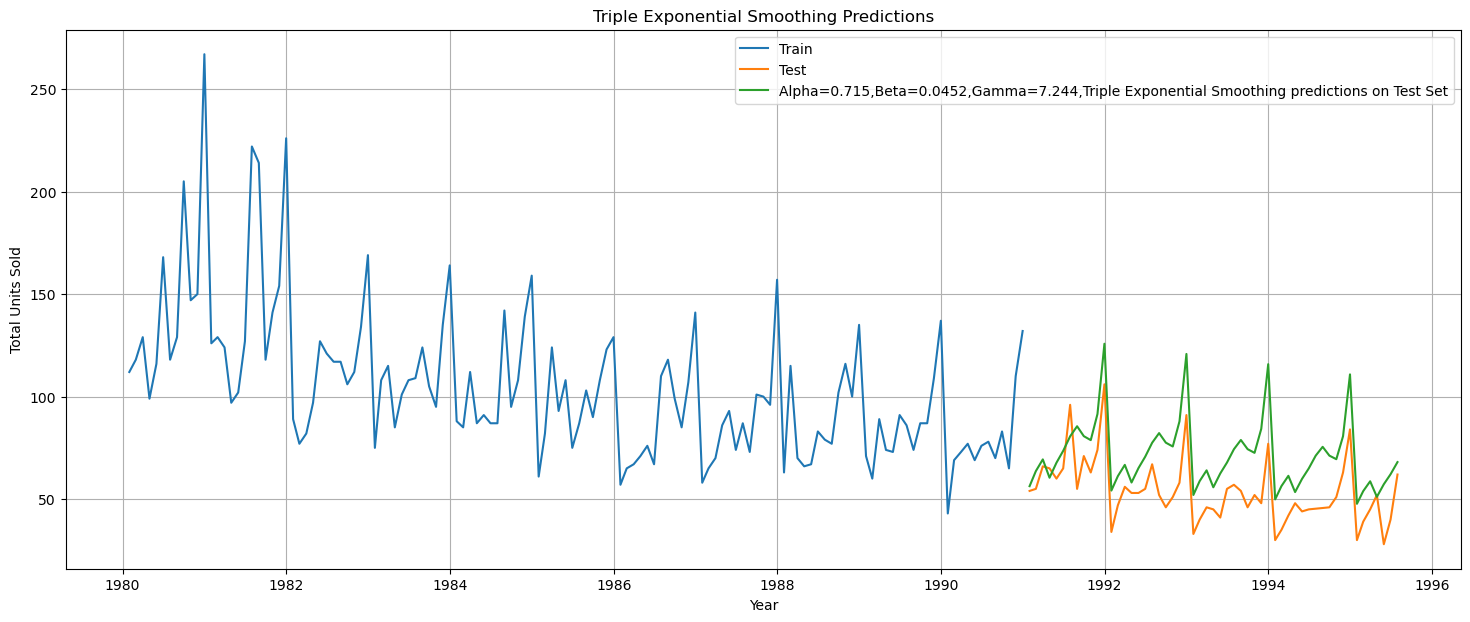

In [203]:
# Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,7))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.715,Beta=0.0452,Gamma=7.244,Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.grid();

In [206]:
# Test Data

rmse_tes_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.0495,Gamma=0.362, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_tes_test))

For Alpha=0.111,Beta=0.0495,Gamma=0.362, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 20.157


In [207]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_tes_test]}
                           ,index=['Alpha=0.715,Beta=0.0452,Gamma=7.244,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE
Linear Regression                                   15.268955
Simple Average                                      53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha =0.1236,SimpleExponentialSmoothing            37.592212
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  16.329097
Alpha=0.715,Beta=0.0452,Gamma=7.244,Triple Expo...  20.156763

In [208]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6_2 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6_2

Empty DataFrame
Columns: [Alpha, Beta, Gamma, Train RMSE, Test RMSE]
Index: []

In [209]:
for i in np.arange(0.1, 1.05, 0.05):
    for j in np.arange(0.1, 1.05, 0.05):
        for k in np.arange(0.1, 1.05, 0.05):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k,
                                                  optimized=False, use_brute=True)
            TES_train['predict', i, j, k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict', i, j, k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test))

            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'], TES_train['predict', i, j, k], squared=False)
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'], TES_test['predict', i, j, k], squared=False)

            # Create a DataFrame for the new row
            new_row = pd.DataFrame({'Alpha': [i], 'Beta': [j], 'Gamma': [k],
                                    'Train RMSE': [rmse_model8_train], 'Test RMSE': [rmse_model8_test]})

            # Use pd.concat to add the new row to the existing resultsDf_6_2 DataFrame
            resultsDf_6_2 = pd.concat([resultsDf_6_2, new_row], ignore_index=True)

# Optionally, print or return resultsDf_6_2 to verify the output
print(resultsDf_6_2)

      Alpha  Beta  Gamma    Train RMSE     Test RMSE
0       0.1   0.1   0.10     19.535124     11.827223
1       0.1   0.1   0.15     19.784754     11.666609
2       0.1   0.1   0.20     20.068055     11.617688
3       0.1   0.1   0.25     20.378996     11.649310
4       0.1   0.1   0.30     20.714821     11.746627
...     ...   ...    ...           ...           ...
6854    1.0   1.0   0.80   2438.212926   2573.842630
6855    1.0   1.0   0.85  24668.257202   5275.319669
6856    1.0   1.0   0.90  28835.801101   3522.899080
6857    1.0   1.0   0.95   7232.599744  19328.687218
6858    1.0   1.0   1.00   1577.905281   3104.659354

[6859 rows x 5 columns]


In [210]:
resultsDf_6_2

Alpha  Beta  Gamma    Train RMSE     Test RMSE
0       0.1   0.1   0.10     19.535124     11.827223
1       0.1   0.1   0.15     19.784754     11.666609
2       0.1   0.1   0.20     20.068055     11.617688
3       0.1   0.1   0.25     20.378996     11.649310
4       0.1   0.1   0.30     20.714821     11.746627
...     ...   ...    ...           ...           ...
6854    1.0   1.0   0.80   2438.212926   2573.842630
6855    1.0   1.0   0.85  24668.257202   5275.319669
6856    1.0   1.0   0.90  28835.801101   3522.899080
6857    1.0   1.0   0.95   7232.599744  19328.687218
6858    1.0   1.0   1.00   1577.905281   3104.659354

[6859 rows x 5 columns]

In [211]:
resultsDf_6_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Test RMSE
38    0.1  0.20   0.10   19.770392   9.223504
19    0.1  0.15   0.10   19.647564   9.280724
20    0.1  0.15   0.15   19.879642   9.313390
39    0.1  0.20   0.15   19.993053   9.337596
21    0.1  0.15   0.20   20.148043   9.406875

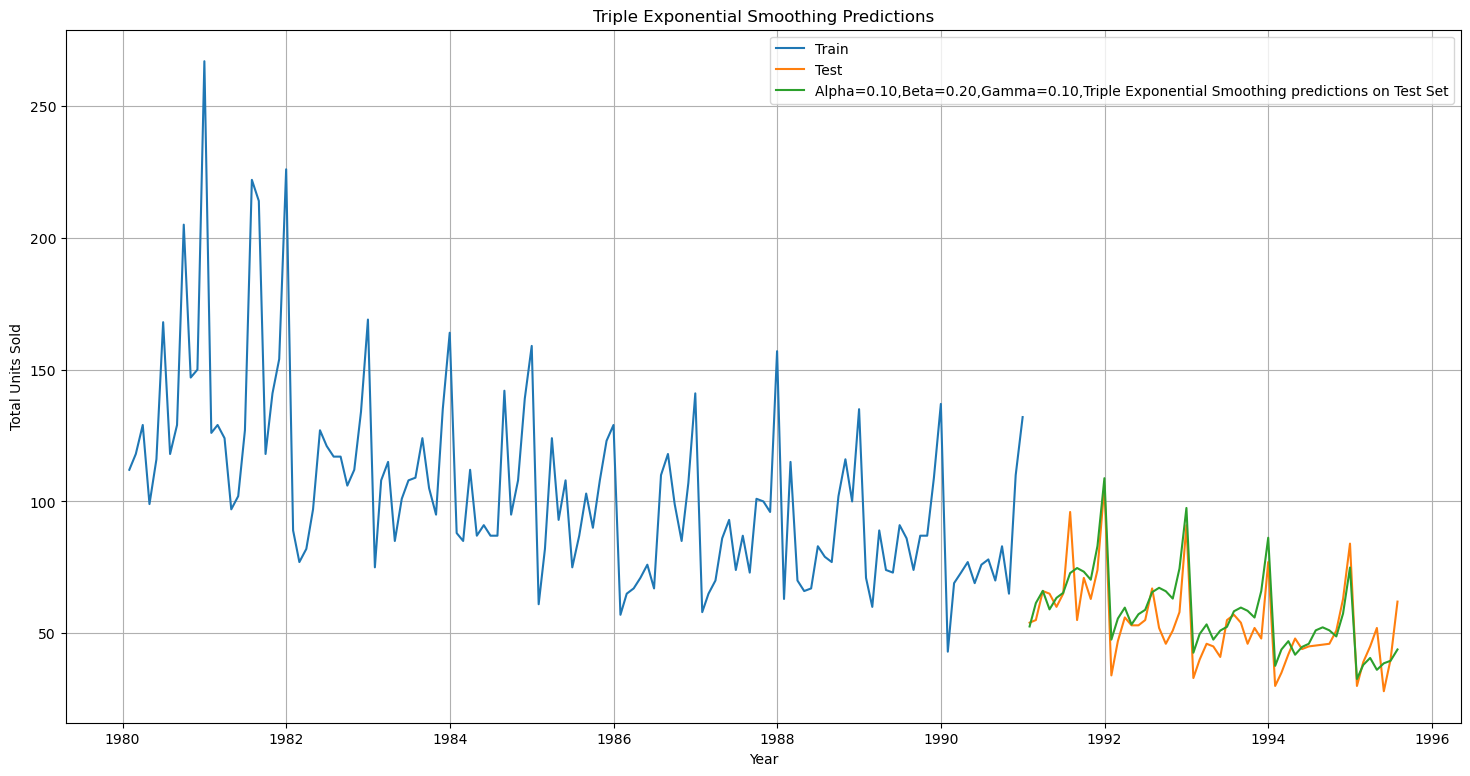

In [212]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=0.10,smoothing_trend=0.20,smoothing_seasonal=0.10,optimized=False,use_brute=True)
TES_train['predict',0.10,0.20,0.10] = model_TES_alpha_i_j_k.fittedvalues
TES_test['predict',0.10,0.20,0.10] = model_TES_alpha_i_j_k.forecast(steps=len(test))
rmse_tes_test_lowest = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',0.10,0.20,0.10],squared=False)
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.10,0.20,0.10], label='Alpha=0.10,Beta=0.20,Gamma=0.10,Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.grid();

In [213]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_tes_test_lowest]}
                           ,index=['Alpha=0.10,Beta=0.20,Gamma=0.10,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE
Linear Regression                                   15.268955
Simple Average                                      53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha =0.1236,SimpleExponentialSmoothing            37.592212
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  16.329097
Alpha=0.715,Beta=0.0452,Gamma=7.244,Triple Expo...  20.156763
Alpha=0.10,Beta=0.20,Gamma=0.10,Triple Exponent...   9.223504

In [214]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.10,Beta=0.20,Gamma=0.10,Triple Exponent...   9.223504
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Linear Regression                                   15.268955
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  16.329097
Alpha=0.715,Beta=0.0452,Gamma=7.244,Triple Expo...  20.156763
Alpha =0.1236,SimpleExponentialSmoothing            37.592212
Simple Average                                      53.460570

## CHECK FOR STATIONARITY (ROSE)

In [216]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

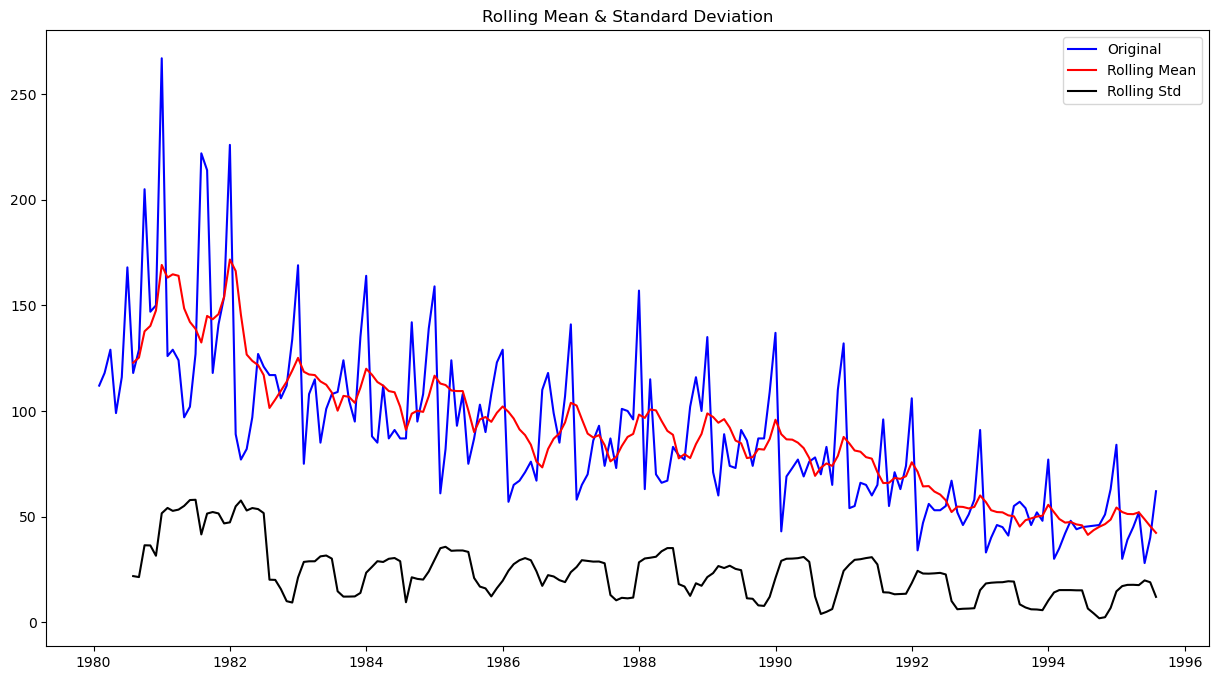

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [217]:
test_stationarity(df_rose['Rose'])

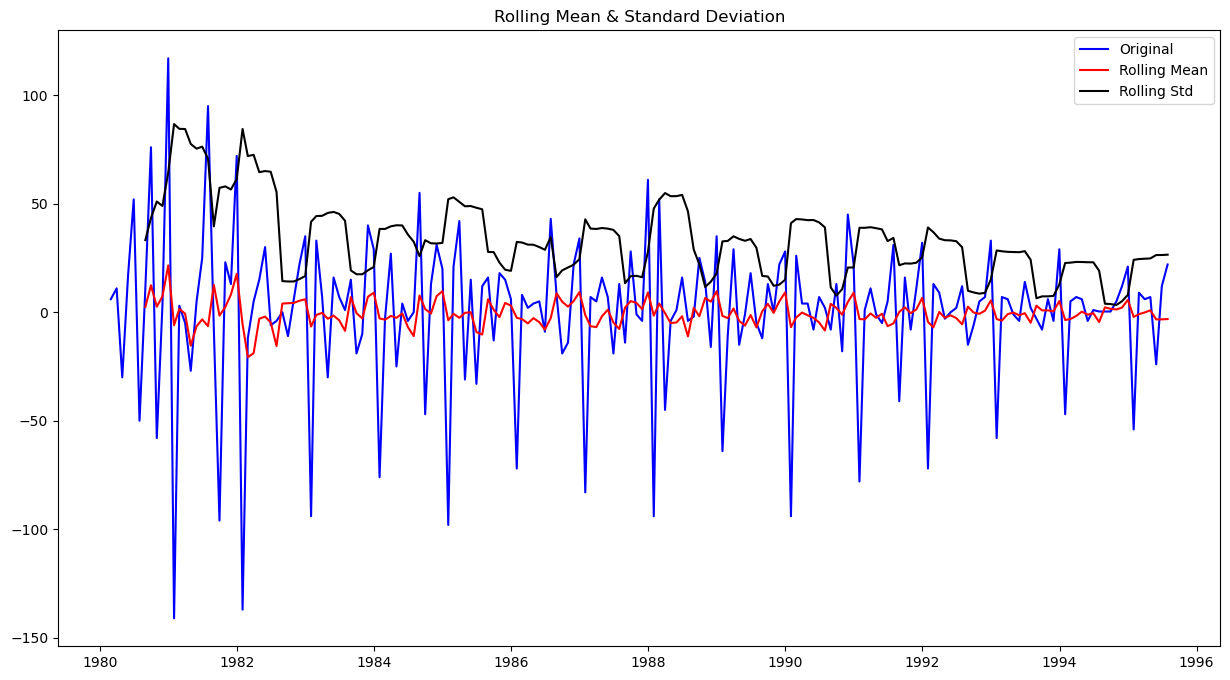

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [218]:
test_stationarity(df_rose['Rose'].diff().dropna())

## MODEL BUILDING - STATIONARY DATA (ROSE)

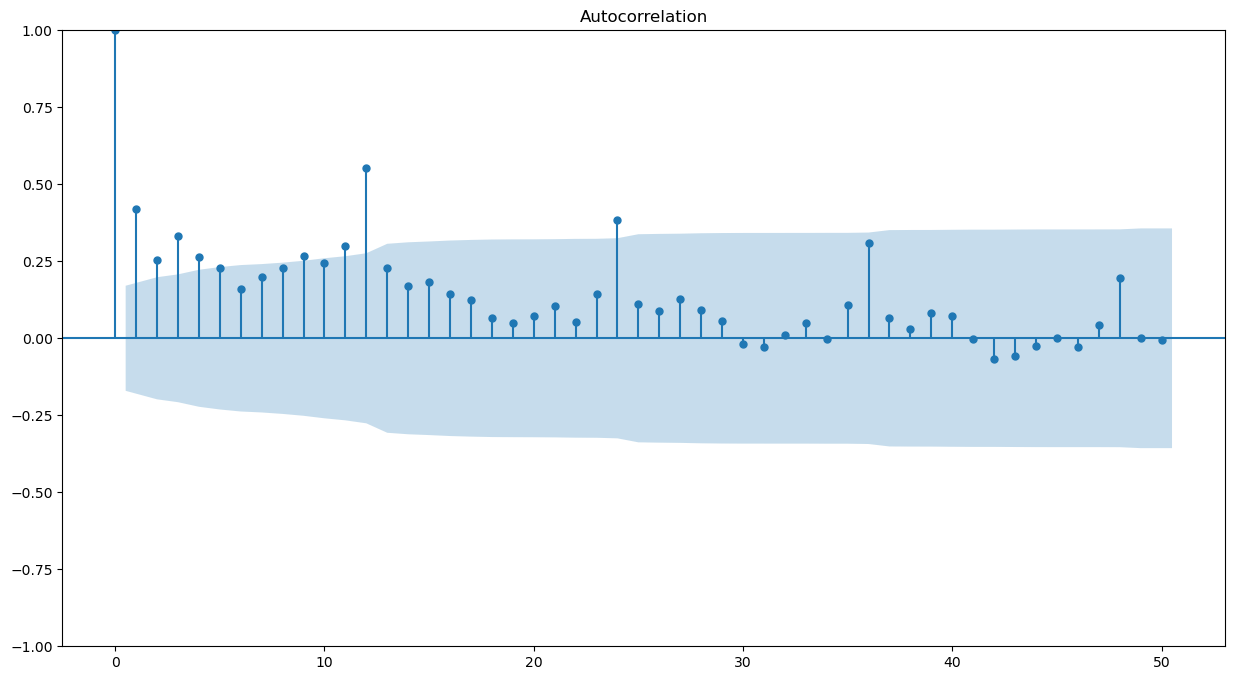

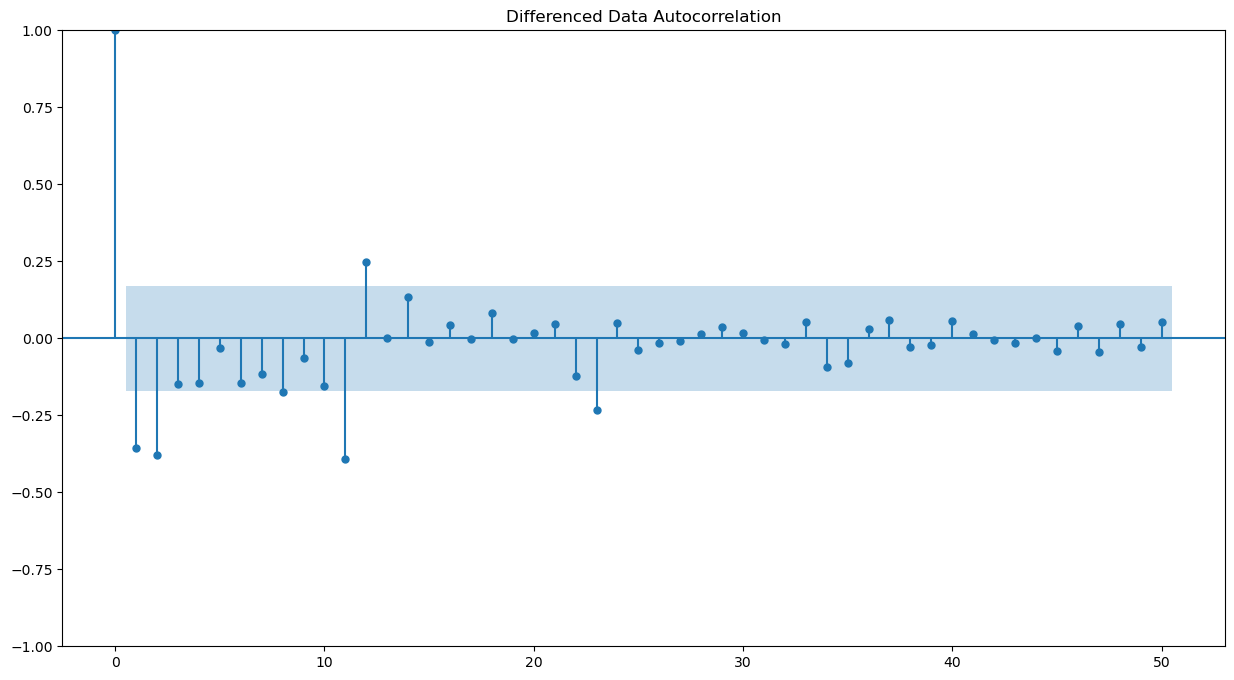

In [220]:
# Plot ACF (AutoCorrelation Function) for the given time series data
plot_acf(train['Rose'], lags=50)  # Replace 'train['Sparkling']' with your actual data series

# Plot PACF (Partial AutoCorrelation Function) for the given time series data
plot_pacf(train['Rose'].diff().dropna(), lags=50, title='Differenced Data Autocorrelation')  # Replace 'train['Sparkling']' with your actual data series

# Show the plots
plt.show()

In [223]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 5
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [224]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [225]:
for param in pdq:
    # Fitting the ARIMA model
    ARIMA_model = ARIMA(train['Rose'].values, order=param).fit()
    
    # Printing the parameters and AIC
    print(f'ARIMA{param} - AIC:{ARIMA_model.aic}')
    
    # Creating a temporary DataFrame for the current iteration
    temp_df = pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})
    
    # Concatenating the temporary DataFrame with ARIMA_AIC
    ARIMA_AIC = pd.concat([ARIMA_AIC, temp_df], ignore_index=True)

# Now, ARIMA_AIC contains the results

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535818
ARIMA(0, 1, 3) - AIC:1280.5453761734645
ARIMA(0, 1, 4) - AIC:1281.6766982143945
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380064
ARIMA(1, 1, 2) - AIC:1279.8707234231902
ARIMA(1, 1, 3) - AIC:1281.870722330998
ARIMA(1, 1, 4) - AIC:1279.6052641815559
ARIMA(2, 1, 0) - AIC:1298.611034160493
ARIMA(2, 1, 1) - AIC:1281.507862186858
ARIMA(2, 1, 2) - AIC:1281.8707222264393
ARIMA(2, 1, 3) - AIC:1274.695440337383
ARIMA(2, 1, 4) - AIC:1278.7685759661513
ARIMA(3, 1, 0) - AIC:1297.4810917271675
ARIMA(3, 1, 1) - AIC:1282.4192776271864
ARIMA(3, 1, 2) - AIC:1283.720740597716
ARIMA(3, 1, 3) - AIC:1278.6579959089877
ARIMA(3, 1, 4) - AIC:1287.7190768625042
ARIMA(4, 1, 0) - AIC:1296.32665690044
ARIMA(4, 1, 1) - AIC:1283.7931715123063
ARIMA(4, 1, 2) - AIC:1285.7182485629369
ARIMA(4, 1, 3) - AIC:1278.4514122163318
ARIMA(4, 1, 4) - AIC:1282.3706429160204


In [226]:
# sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
13  (2, 1, 3)  1274.695440
23  (4, 1, 3)  1278.451412
18  (3, 1, 3)  1278.657996
14  (2, 1, 4)  1278.768576
9   (1, 1, 4)  1279.605264
2   (0, 1, 2)  1279.671529
7   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376
6   (1, 1, 1)  1280.574230
11  (2, 1, 1)  1281.507862
4   (0, 1, 4)  1281.676698
12  (2, 1, 2)  1281.870722
8   (1, 1, 3)  1281.870722
1   (0, 1, 1)  1282.309832
24  (4, 1, 4)  1282.370643
16  (3, 1, 1)  1282.419278
17  (3, 1, 2)  1283.720741
21  (4, 1, 1)  1283.793172
22  (4, 1, 2)  1285.718249
19  (3, 1, 4)  1287.719077
20  (4, 1, 0)  1296.326657
15  (3, 1, 0)  1297.481092
10  (2, 1, 0)  1298.611034
5   (1, 1, 0)  1317.350311
0   (0, 1, 0)  1333.154673

In [227]:
auto_ARIMA = ARIMA(train['Rose'], order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 16 Mar 2025   AIC                           1274.695
Time:                        12:57:14   BIC                           1291.947
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -20.035      0.000      -1.842      -1.514
ar.L2         -0.7291      0.084     -8.706      0.000      -0.893      -0.565
ma.L1          1.0444      0.618      1.691      0.0

In [229]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Rose'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

36.812613558825696


In [230]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

Test RMSE
Linear Regression                                   15.268955
Simple Average                                      53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha =0.1236,SimpleExponentialSmoothing            37.592212
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  16.329097
Alpha=0.715,Beta=0.0452,Gamma=7.244,Triple Expo...  20.156763
Alpha=0.10,Beta=0.20,Gamma=0.10,Triple Exponent...   9.223504
Auto_ARIMA                                          36.812614

In [231]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 16 Mar 2025   AIC                           1281.871
Time:                        12:57:14   BIC                           1296.247
Sample:                    01-31-1980   HQIC                          1287.712
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

In [232]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

predicted_manual_ARIMA

1991-01-31    91.159512
1991-02-28    85.314628
1991-03-31    87.962468
1991-04-30    86.759563
1991-05-31    87.306038
1991-06-30    87.057777
1991-07-31    87.170561
1991-08-31    87.119324
1991-09-30    87.142601
1991-10-31    87.132026
1991-11-30    87.136830
1991-12-31    87.134648
1992-01-31    87.135639
1992-02-29    87.135189
1992-03-31    87.135393
1992-04-30    87.135300
1992-05-31    87.135342
1992-06-30    87.135323
1992-07-31    87.135332
1992-08-31    87.135328
1992-09-30    87.135330
1992-10-31    87.135329
1992-11-30    87.135329
1992-12-31    87.135329
1993-01-31    87.135329
1993-02-28    87.135329
1993-03-31    87.135329
1993-04-30    87.135329
1993-05-31    87.135329
1993-06-30    87.135329
1993-07-31    87.135329
1993-08-31    87.135329
1993-09-30    87.135329
1993-10-31    87.135329
1993-11-30    87.135329
1993-12-31    87.135329
1994-01-31    87.135329
1994-02-28    87.135329
1994-03-31    87.135329
1994-04-30    87.135329
1994-05-31    87.135329
1994-06-30    87

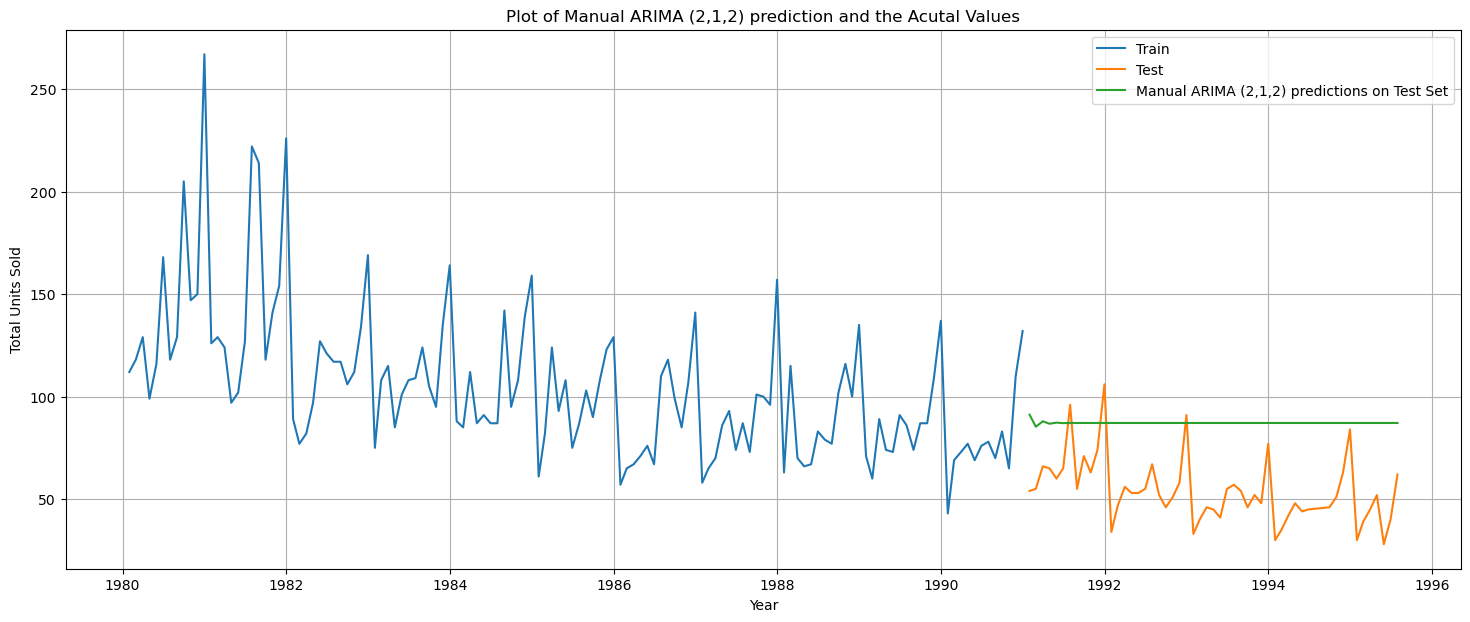

In [233]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,7))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_manual_ARIMA, label='Manual ARIMA (2,1,2) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual ARIMA (2,1,2) prediction and the Acutal Values');
plt.xlabel('Year')
plt.ylabel('Total Units Sold');

In [234]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)

print('RMSE:',rmse)

RMSE: 36.871196620263596


In [235]:
results2 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Manual ARIMA (2,1,2)'])
                                   
resultsDf = pd.concat([resultsDf, results2])
resultsDf

Test RMSE
Linear Regression                                   15.268955
Simple Average                                      53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha =0.1236,SimpleExponentialSmoothing            37.592212
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  16.329097
Alpha=0.715,Beta=0.0452,Gamma=7.244,Triple Expo...  20.156763
Alpha=0.10,Beta=0.20,Gamma=0.10,Triple Exponent...   9.223504
Auto_ARIMA                                          36.812614
Manual ARIMA (2,1,2)                                36.871197

In [236]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(0,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 0)(0, 0, 0, 12)
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [238]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [239]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        # Create and fit the SARIMA model
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                                 order=param,
                                                 seasonal_order=param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        # Print the model's AIC
        print(f'SARIMA{param}x{param_seasonal} - AIC:{results_SARIMA.aic}')
        
        # Create a temporary DataFrame for the current iteration's results
        temp_df = pd.DataFrame({'param': [param], 
                                'seasonal': [param_seasonal], 
                                'AIC': [results_SARIMA.aic]})
        
        # Concatenate the results into the SARIMA_AIC DataFrame
        SARIMA_AIC = pd.concat([SARIMA_AIC, temp_df], ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.42308272074
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.437529638089
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:2745.338702610457
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385924
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753086
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3327.579108610002
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.879454069753
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945819
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:6423.037926477965
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931055
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702716035
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136126451
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:4178.461487766017
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2, 1

In [240]:
SARIMA_AIC.sort_values(by=['AIC']).head(20)

param       seasonal         AIC
171  (2, 1, 2)  (2, 0, 3, 12)   20.000000
123  (1, 1, 3)  (2, 0, 3, 12)  299.134431
155  (2, 1, 1)  (2, 0, 3, 12)  441.994261
219  (3, 1, 1)  (2, 0, 3, 12)  518.928878
27   (0, 1, 1)  (2, 0, 3, 12)  657.687035
222  (3, 1, 1)  (3, 0, 2, 12)  774.400287
238  (3, 1, 2)  (3, 0, 2, 12)  774.880935
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330
252  (3, 1, 3)  (3, 0, 0, 12)  775.561018
237  (3, 1, 2)  (3, 0, 1, 12)  776.346213
253  (3, 1, 3)  (3, 0, 1, 12)  776.369039
236  (3, 1, 2)  (3, 0, 0, 12)  777.250564
254  (3, 1, 3)  (3, 0, 2, 12)  778.231616
190  (2, 1, 3)  (3, 0, 2, 12)  781.045253
188  (2, 1, 3)  (3, 0, 0, 12)  782.407421
189  (2, 1, 3)  (3, 0, 1, 12)  783.410147
172  (2, 1, 2)  (3, 0, 0, 12)  785.119971
156  (2, 1, 1)  (3, 0, 0, 12)  785.393260
173  (2, 1, 2)  (3, 0, 1, 12)  786.941004

In [241]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sun, 16 Mar 2025   AIC                            774.400
Time:                                         13:01:36   BIC                            799.618
Sample:                                     01-31-1980   HQIC                           784.578
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.201       0

In [242]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))
predicted_auto_SARIMA.predicted_mean

1991-01-31     55.234224
1991-02-28     68.122503
1991-03-31     67.908196
1991-04-30     66.785398
1991-05-31     69.760571
1991-06-30     70.327924
1991-07-31     75.359124
1991-08-31     76.493577
1991-09-30     78.970319
1991-10-31     76.538085
1991-11-30     93.248282
1991-12-31    116.282275
1992-01-31     55.201959
1992-02-29     64.443148
1992-03-31     68.547504
1992-04-30     63.870917
1992-05-31     67.700232
1992-06-30     68.442481
1992-07-31     72.971669
1992-08-31     74.326954
1992-09-30     75.316488
1992-10-31     76.046617
1992-11-30     87.419973
1992-12-31    109.806048
1993-01-31     51.297219
1993-02-28     62.616057
1993-03-31     65.911640
1993-04-30     62.262920
1993-05-31     64.611802
1993-06-30     65.746321
1993-07-31     69.825634
1993-08-31     70.420889
1993-09-30     72.330315
1993-10-31     71.364993
1993-11-30     84.721134
1993-12-31    105.356916
1994-01-31     49.948522
1994-02-28     60.310556
1994-03-31     63.157409
1994-04-30     59.895273


Text(0, 0.5, 'Total Units Sold')

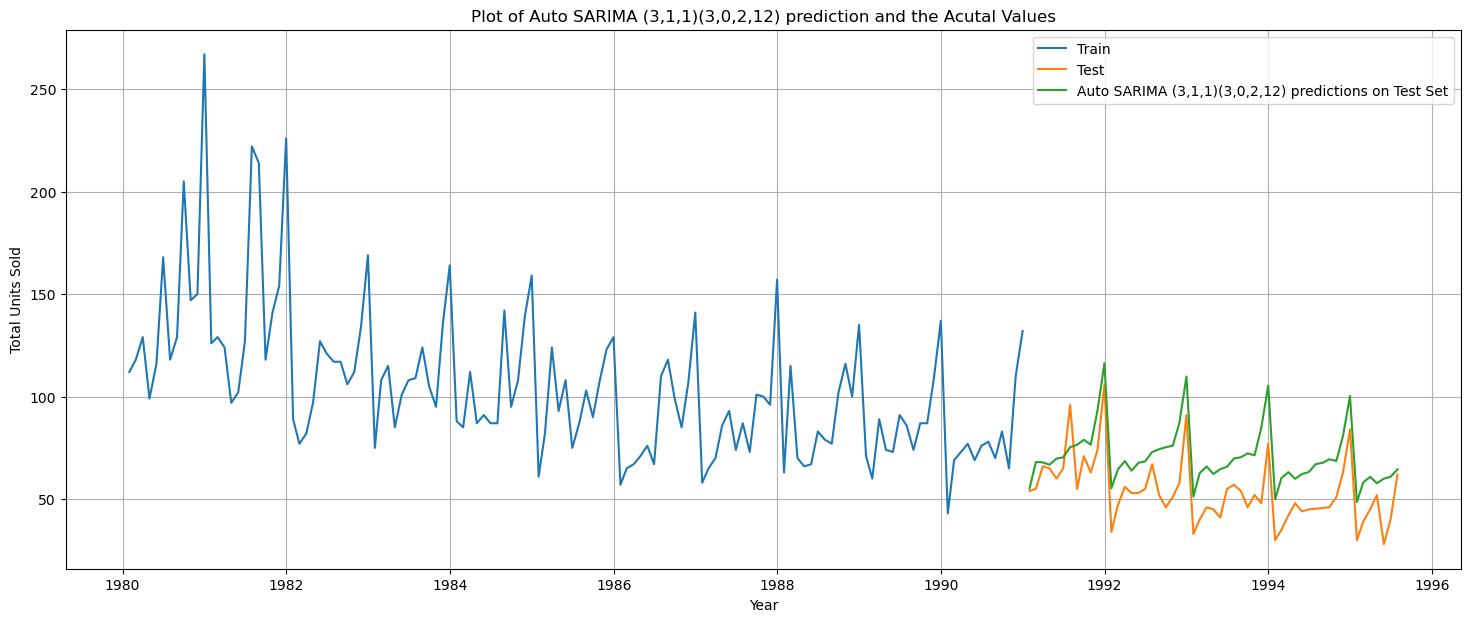

In [243]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,7))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_auto_SARIMA.predicted_mean, label='Auto SARIMA (3,1,1)(3,0,2,12) predictions on Test Set')
plt.legend(loc='best')
plt.grid();
plt.title('Plot of Auto SARIMA (3,1,1)(3,0,2,12) prediction and the Acutal Values');
plt.xlabel('Year')
plt.ylabel('Total Units Sold')

In [245]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)

print('RMSE:',rmse)

RMSE: 18.88129766625739


In [246]:
results3 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto SARIMA (3,1,2)(3,0,1,12)'])
                                   
resultsDf = pd.concat([resultsDf, results3])
resultsDf

Test RMSE
Linear Regression                                   15.268955
Simple Average                                      53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha =0.1236,SimpleExponentialSmoothing            37.592212
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  16.329097
Alpha=0.715,Beta=0.0452,Gamma=7.244,Triple Expo...  20.156763
Alpha=0.10,Beta=0.20,Gamma=0.10,Triple Exponent...   9.223504
Auto_ARIMA                                          36.812614
Manual ARIMA (2,1,2)                                36.871197
Auto SARIMA (3,1,2)(3,0,1,12)                       18.881298

In [247]:
# build manual sarima model
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(4,1,2),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -446.102
Date:                              Sun, 16 Mar 2025   AIC                            908.203
Time:                                      13:01:37   BIC                            929.358
Sample:                                  01-31-1980   HQIC                           916.774
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8046      0.119     -6.778      0.000      -1.037      -0.572
ar.L2          0.03

In [248]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA.predicted_mean

1991-01-31     47.471855
1991-02-28     63.350018
1991-03-31     65.513284
1991-04-30     67.317246
1991-05-31     61.756375
1991-06-30     72.816701
1991-07-31     71.513805
1991-08-31     67.808600
1991-09-30     77.918559
1991-10-31     73.748601
1991-11-30     97.305532
1991-12-31    127.634764
1992-01-31     41.226594
1992-02-29     59.413102
1992-03-31     61.742032
1992-04-30     62.374966
1992-05-31     57.582058
1992-06-30     67.508101
1992-07-31     67.387063
1992-08-31     62.729082
1992-09-30     73.769494
1992-10-31     68.753602
1992-11-30     93.025767
1992-12-31    122.710419
1993-01-31     36.869577
1993-02-28     54.567998
1993-03-31     57.326444
1993-04-30     57.584659
1993-05-31     53.116287
1993-06-30     62.758969
1993-07-31     62.884541
1993-08-31     58.012436
1993-09-30     69.239306
1993-10-31     64.061246
1993-11-30     88.474348
1993-12-31    118.036387
1994-01-31     32.302168
1994-02-28     49.907893
1994-03-31     52.746956
1994-04-30     52.935070


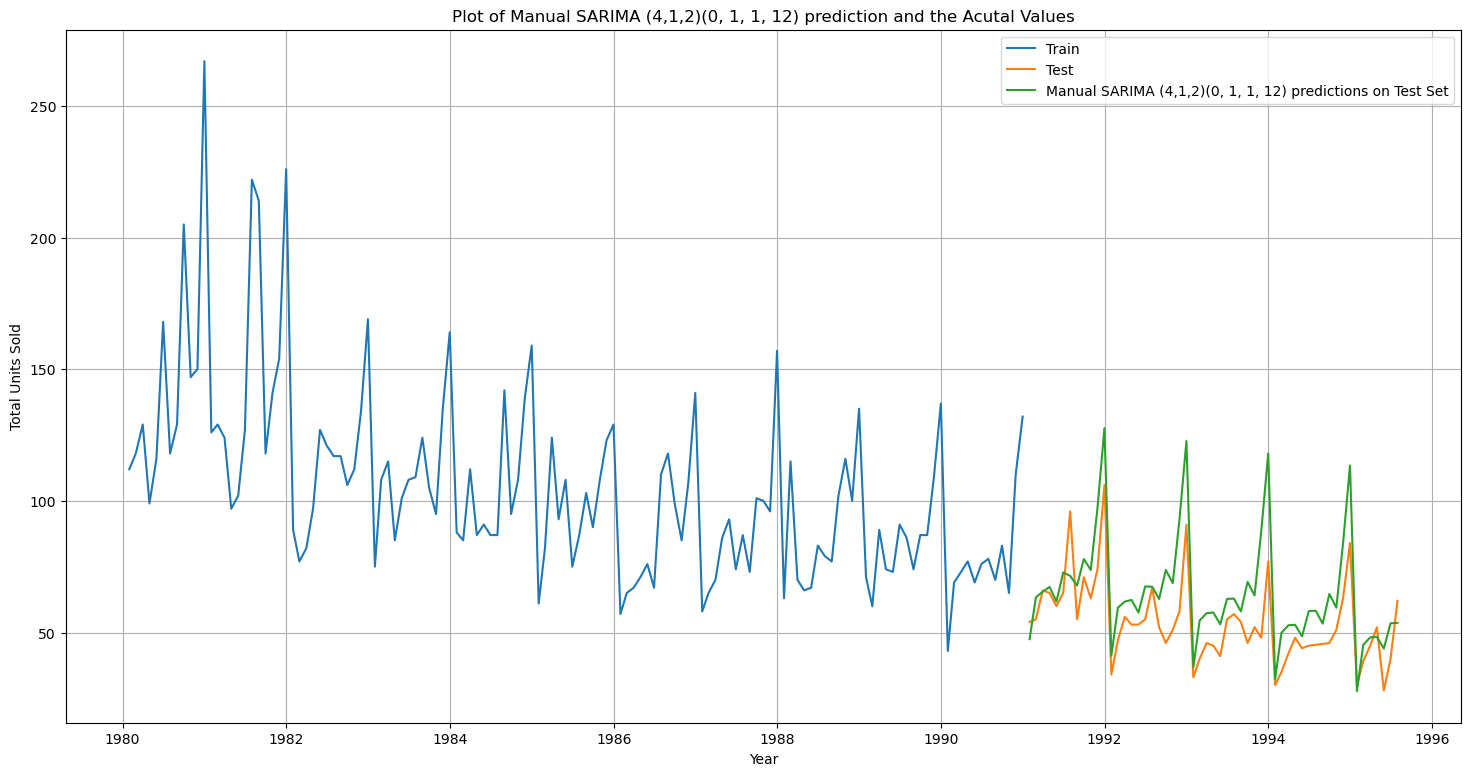

In [249]:
# plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual SARIMA (4,1,2)(0, 1, 1, 12) prediction and the Acutal Values');
plt.xlabel('Year')
plt.ylabel('Total Units Sold');

In [251]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
print('RMSE:',rmse)

RMSE: 15.907314416547345


In [252]:
results4 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Manual SARIMA (4, 1, 2)(0, 1, 1, 12)'])
                                   
resultsDf = pd.concat([resultsDf, results4])
resultsDf

Test RMSE
Linear Regression                                   15.268955
Simple Average                                      53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha =0.1236,SimpleExponentialSmoothing            37.592212
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  16.329097
Alpha=0.715,Beta=0.0452,Gamma=7.244,Triple Expo...  20.156763
Alpha=0.10,Beta=0.20,Gamma=0.10,Triple Exponent...   9.223504
Auto_ARIMA                                          36.812614
Manual ARIMA (2,1,2)                                36.871197
Auto SARIMA (3,1,2)(3,0,1,12)                       18.881298
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                15.907314

In [253]:
#Combining the tables which contained the exponential smoothing models and ARIMA/SARIMA into one
resultsDf_Final = pd.concat([resultsDf,results4])

resultsDf_Final

Test RMSE
Linear Regression                                   15.268955
Simple Average                                      53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha =0.1236,SimpleExponentialSmoothing            37.592212
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  16.329097
Alpha=0.715,Beta=0.0452,Gamma=7.244,Triple Expo...  20.156763
Alpha=0.10,Beta=0.20,Gamma=0.10,Triple Exponent...   9.223504
Auto_ARIMA                                          36.812614
Manual ARIMA (2,1,2)                                36.871197
Auto SARIMA (3,1,2)(3,0,1,12)                       18.881298
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                15.907314
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                15.907314

In [254]:
resultsDf_Final.sort_values(by='Test RMSE',ascending=True)

Test RMSE
Alpha=0.10,Beta=0.20,Gamma=0.10,Triple Exponent...   9.223504
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Linear Regression                                   15.268955
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                15.907314
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                15.907314
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  16.329097
Auto SARIMA (3,1,2)(3,0,1,12)                       18.881298
Alpha=0.715,Beta=0.0452,Gamma=7.244,Triple Expo...  20.156763
Auto_ARIMA                                          36.812614
Manual ARIMA (2,1,2)                                36.871197
Alpha =0.1236,SimpleExponentialSmoothing            37.592212
Simple Average                                      53.460570

Text(0, 0.5, 'Total Units Sold')

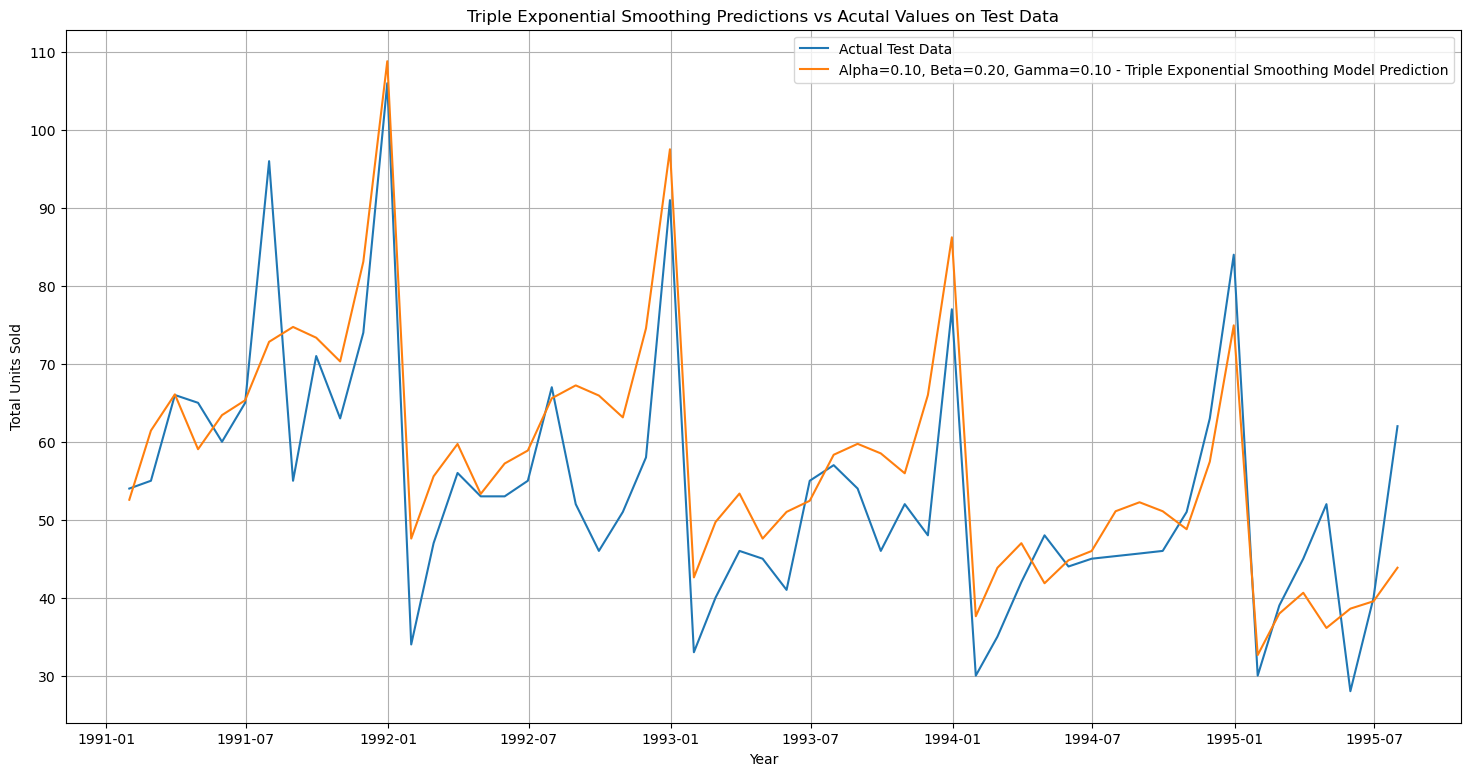

In [255]:
## Plotting on both the Training data

plt.figure(figsize=(18,9))
plt.plot(test['Rose'], label='Actual Test Data')

plt.plot(TES_test['predict', 0.10,0.20,0.10], label='Alpha=0.10, Beta=0.20, Gamma=0.10 - Triple Exponential Smoothing Model Prediction')

plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Predictions vs Acutal Values on Test Data');
plt.xlabel('Year')
plt.ylabel('Total Units Sold')

Text(0, 0.5, 'Total Units Sold')

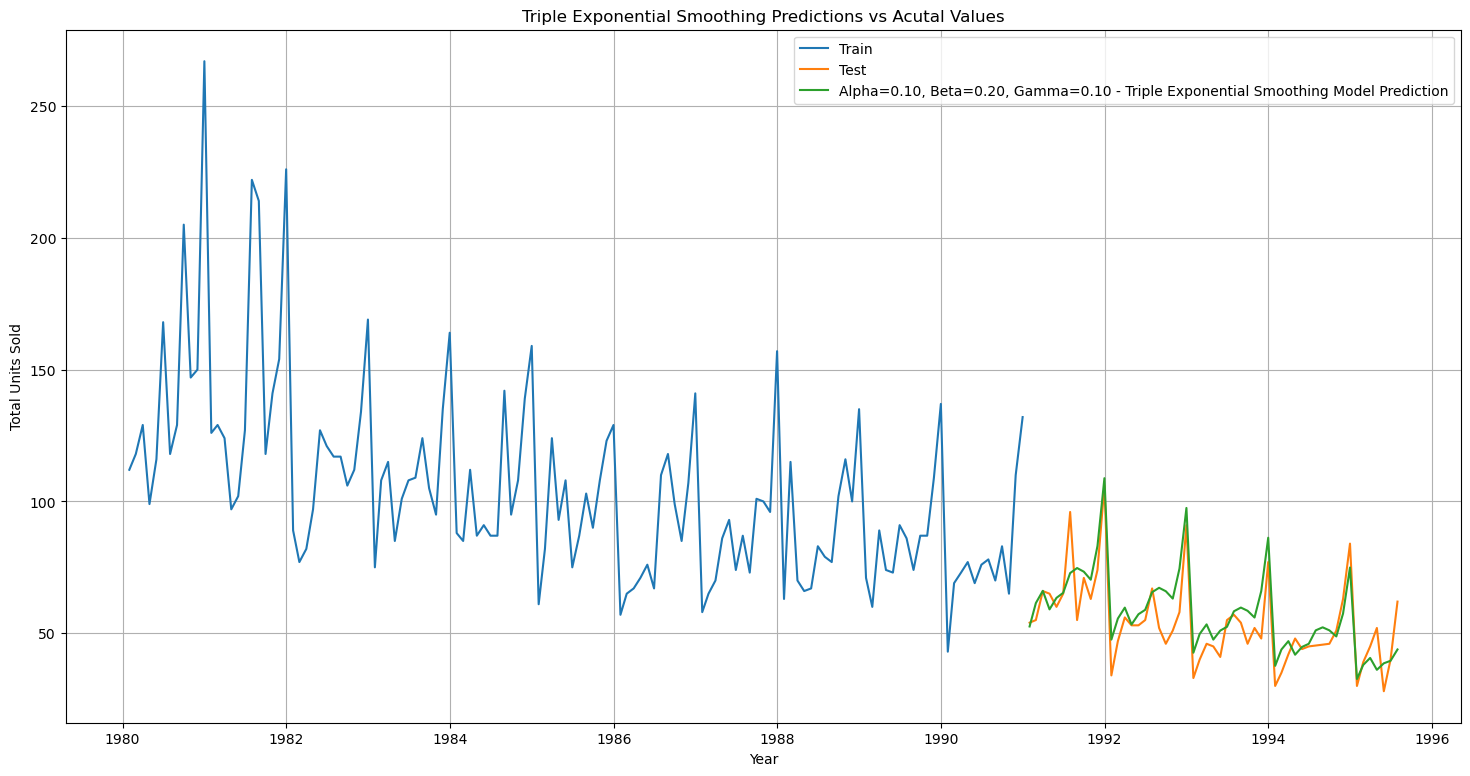

In [256]:
 ## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(TES_test['predict', 0.10,0.20,0.10], label='Alpha=0.10, Beta=0.20, Gamma=0.10 - Triple Exponential Smoothing Model Prediction')

plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Predictions vs Acutal Values');
plt.xlabel('Year')
plt.ylabel('Total Units Sold')

In [257]:
TES_Fullmodel = ExponentialSmoothing(df_rose['Rose'],trend='additive',seasonal='multiplicative',freq='M').fit(smoothing_level=0.10, smoothing_trend=0.20, smoothing_seasonal=0.10)

TES_Fullmodel.params

{'smoothing_level': 0.1,
 'smoothing_trend': 0.2,
 'smoothing_seasonal': 0.1,
 'damping_trend': nan,
 'initial_level': 137.21164948461217,
 'initial_trend': 1.1829435815686233,
 'initial_seasons': array([0.80765592, 0.87835253, 0.95819267, 0.83278379, 0.92692664,
        1.03876038, 1.16615034, 1.23043881, 1.12622025, 1.11029337,
        1.25325885, 1.77558794]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [258]:
RMSE_fullmodel = metrics.mean_squared_error(df_rose['Rose'],TES_Fullmodel.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel)

RMSE: 17.02370551723895


In [259]:
# Getting the predictions for the 12 months into the future
prediction = TES_Fullmodel.forecast(steps=12)
print('Forecast of next 12 months')
prediction.tail(12)

Forecast of next 12 months


1995-08-31    50.084238
1995-09-30    49.875172
1995-10-31    50.832569
1995-11-30    59.191120
1995-12-31    82.350418
1996-01-31    33.714561
1996-02-29    40.789235
1996-03-31    46.086803
1996-04-30    44.925082
1996-05-31    43.083063
1996-06-30    47.998046
1996-07-31    54.895123
Freq: ME, dtype: float64

<Figure size 1800x900 with 0 Axes>

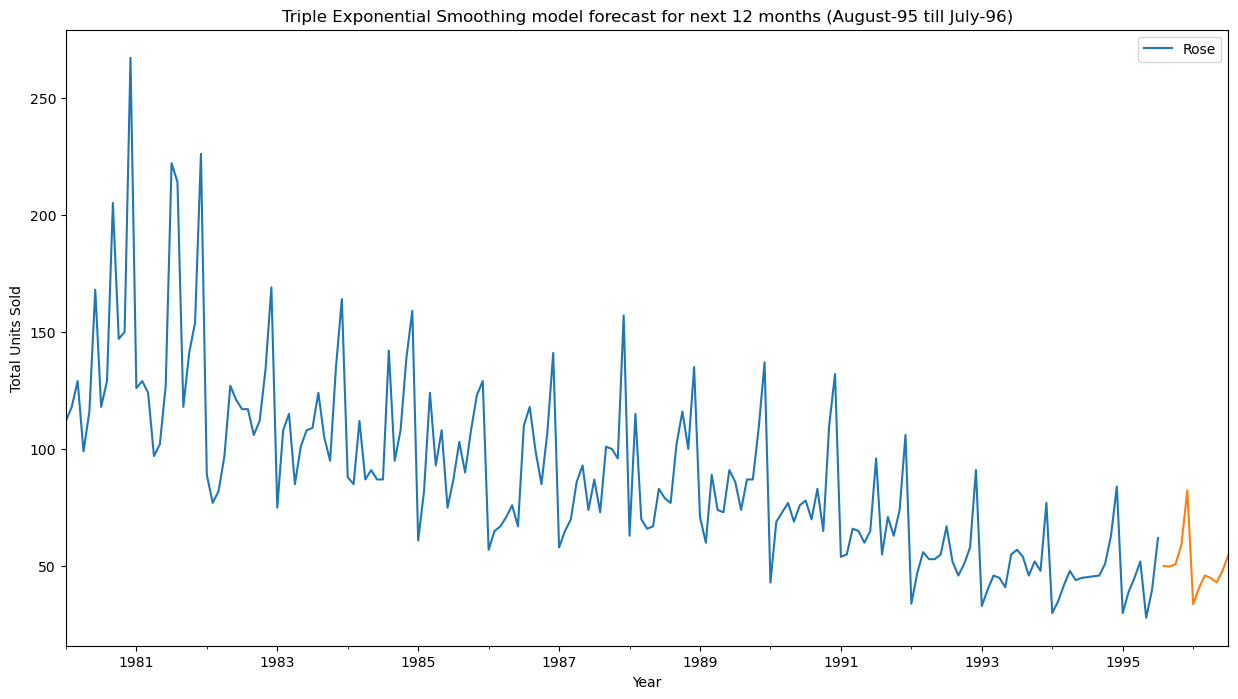

In [260]:
plt.figure(figsize=(18,9))
df_rose.plot()
prediction.plot();
plt.title('Triple Exponential Smoothing model forecast for next 12 months (August-95 till July-96)')
plt.xlabel('Year')
plt.ylabel('Total Units Sold');